# CLASSIFICANDO DADOS DE DIABETES COM MODELOS DE CLASSIFICAÇÃO

Diferente do outro projeto, nesse, os dados passrão pelo processo de padronização (standardization).

**SOBRE OS DADOS**

O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/pima-indians-diabetes-database) e possui as seguintes variáveis:


**1)** PregnanciesNumber : Número de vezes que esteve grávida;

**2)** GlucosePlasma : Concentração de glicose a 2 horas em um teste oral de tolerância à glicose;

**3)** BloodPressureDiastolic : pressão sanguínea (mm Hg)

**4)** SkinThicknessTriceps : Espessura da dobra cutânea (mm)

**5)** Insulin : Insulina sérica de 2 horas (mu U/ml)

**6)** BMI : Índice de massa corporal (IMC)

**7)** DiabetesPedigreeFunction : Função pedigree do diabetes

**8)** Age : Idade (em anos)

**9)** OutcomeClass : Variável de resultado (0 ou 1) 268 de 768 são 1, os outros resultados são 0.

Se for diabético o resultado será 1 e caso não seja, o resultado é zero.


**METODOLOGIA**

Os modelos usados para classificação de dados serão a **regressão logística**, **Support Vector Machine (SVM)**, **Cat Boost** e de **Árvore Aleatória (Random Forest)**. A regressão logística faz parte da classe de regressão de respostas dicotômicas, ou seja, binárias; onde o resultado é ''0'' (geralmente associado a fracasso, não curado, derrota, etc.) ou ''1'' (geralmente associado a sucesso, curado, vitória, etc.). No trabalho em questão classificaremos a partir das features, se o indivíduo é portador (1) ou não (0) de diabetes. Já os modelos SVM, Cat Boost e Random Forest fazem parte de uma classe de algoritmos de classificação supervisionados e não necessariamente classificam, apenas, repostas binárias.

**IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm

**IMPORTANDO OS DADOS**

In [2]:
diabetes=pd.read_csv('diabetes.csv')

**VISUALIZANDO O CONJUNTO DE DADOS**

Abaixo tem o dataset e suas colunas e por padrão o comando head() mostra as 5 primeiras linhas.

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**VISUALIZANDO OS TIPOS DE DADOS DO DATASET**

O dataset tem 768 linhas e nenhuma é nula (ou seja não possui missing values).

In [4]:
#Informações sobre as colunas

#Apenas duas colunas são do tipo float

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**ESTATÍSTICAS DESCRITIVAS DO DATASET**

Podemos ver na tabela abaixo o número de observações, a média, o desvio padrão e outras medidas calculadas provenientes do dataset.

In [5]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos também transpor essa tabela.

In [6]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Separando dados de treino e teste

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
features = diabetes.drop(['Outcome'],axis=1,inplace=False)
classe=diabetes['Outcome']

In [9]:
X_treino,X_teste,y_treino,y_teste=train_test_split(features,classe,random_state=42)

In [10]:
X_treino.shape,X_teste.shape,y_treino.shape,y_teste.shape

((576, 8), (192, 8), (576,), (192,))

In [11]:
bases=[X_treino,X_teste]

# Análise e tratamento da coluna Pregnancies

Abaixo vamos observar alguns gráfico e ver se é possível extrair informações da relação entre variáveis

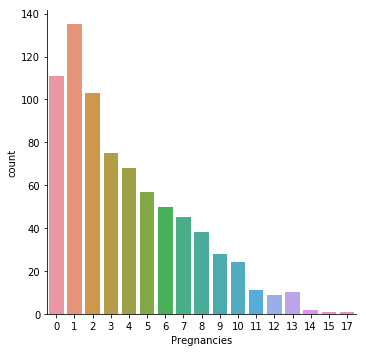

In [12]:
sns.catplot(x="Pregnancies", kind="count", data=diabetes)

In [13]:
diabetes[['Pregnancies','Outcome']].groupby(['Pregnancies'],as_index=False).mean().sort_values(by='Outcome',ascending=False)

#A tabela abaixo mostra a taxa de mulheres grávidas por diabetes

#Aparentemente, quantos mais filhos uma mulher tem, maior a chance dela ter diabetes.

,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.642857
11,11,0.636364
8,8,0.578947
7,7,0.555556
13,13,0.500000
12,12,0.444444
10,10,0.416667


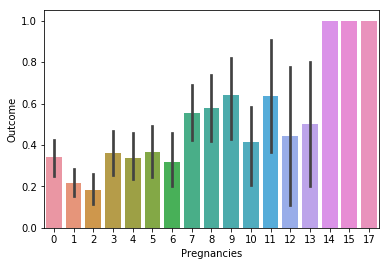

In [14]:
sns.barplot(x="Pregnancies", y="Outcome", data=diabetes)

#O gráfico abaixo mostra o mesmo resultado da tabela acima

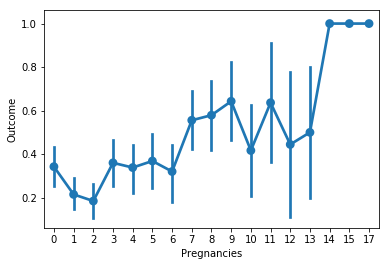

In [15]:
sns.pointplot(x="Pregnancies", y="Outcome", data=diabetes)

#Visualizando em um gráfico de linhas

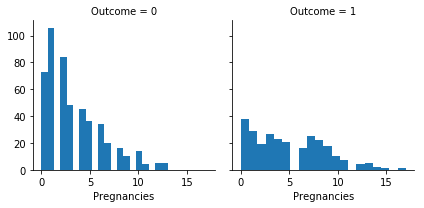

In [16]:
g = sns.FacetGrid(diabetes, col='Outcome')
g.map(plt.hist, 'Pregnancies',bins=20)

#No gráfico abaixo gerado pelo FaceGrid, separamos os resultados 0 e 1

#As não-ocorrências de diabetes foram bem maiores em mulheres que não tiverem filhos

In [17]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [18]:
display(X_treino['Pregnancies'].value_counts(ascending=False))
display(X_teste['Pregnancies'].value_counts(ascending=False))

1     108
0      86
2      70
3      60
4      48
5      44
6      40
7      34
8      27
9      20
10     18
11      8
13      5
12      4
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

2     33
1     27
0     25
4     20
3     15
5     13
8     11
7     11
6     10
9      8
10     6
13     5
12     5
11     3
Name: Pregnancies, dtype: int64

# Análise e tratamento a coluna Age

In [19]:
#Na coluna Age não há dados faltantes

diabetes['Age'].isna().sum()

0

In [20]:
#Também é bom conferir se há alguém com idade zerada, o que acaba não sendo computado no isna().sum()

diabetes['Age'].value_counts(ascending=False)

#Como podemos ver, não há idades com valores zero

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

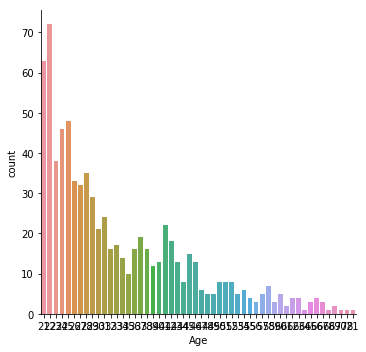

In [21]:
sns.catplot(x="Age", kind="count", data=diabetes)

#Visualizando o resultado acima graficamente

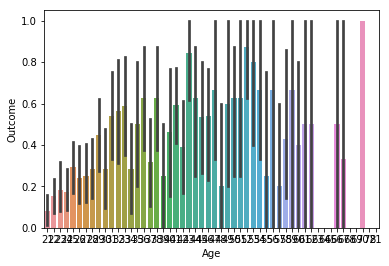

In [22]:
sns.barplot(x="Age",y="Outcome", data=diabetes)

#O gráfico abaixo mostra

In [23]:
X_treino['Age']=(X_treino['Age']-diabetes['Age'].mean())/diabetes['Age'].std()
X_teste['Age']=(X_teste['Age']-diabetes['Age'].mean())/diabetes['Age'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,0.914873
73,4,129,86,20,270,35.1,0.231,-0.870806
352,3,61,82,28,0,34.4,0.243,1.084937
497,2,81,72,15,76,30.1,0.547,-0.700742
145,0,102,75,23,0,0.0,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,0.829840
324,2,112,75,32,0,35.7,0.148,-1.040871
624,2,108,64,0,0,30.8,0.158,-1.040871
690,8,107,80,0,0,24.6,0.856,0.064549
473,7,136,90,0,0,29.9,0.210,1.425067


# Análise e tratamento da coluna Glucose

In [25]:
diabetes['Glucose'].isna().sum()

0

In [26]:
diabetes['Glucose'].value_counts(ascending=False)

100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64

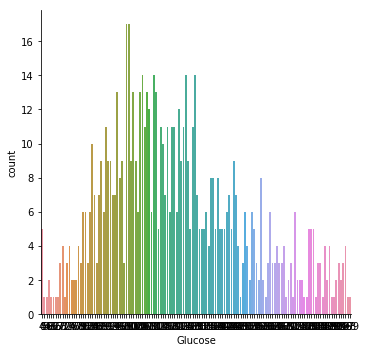

In [27]:
sns.catplot(x="Glucose", kind="count",data=diabetes)

In [28]:
X_treino['Glucose']=(X_treino['Glucose']-diabetes['Glucose'].mean())/diabetes['Glucose'].std()
X_teste['Glucose']=(X_teste['Glucose']-diabetes['Glucose'].mean())/diabetes['Glucose'].std()


C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,0,30,0,39.9,0.569,0.914873
73,4,0.253513,86,20,270,35.1,0.231,-0.870806
352,3,-1.873307,82,28,0,34.4,0.243,1.084937
497,2,-1.247772,72,15,76,30.1,0.547,-0.700742
145,0,-0.590960,75,23,0,0.0,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,58,33,190,34.0,0.430,0.829840
324,2,-0.278192,75,32,0,35.7,0.148,-1.040871
624,2,-0.403299,64,0,0,30.8,0.158,-1.040871
690,8,-0.434576,80,0,0,24.6,0.856,0.064549
473,7,0.472450,90,0,0,29.9,0.210,1.425067


# Análise e tratamento da coluna BloodPressure

In [30]:
#Não há missing values

diabetes['BloodPressure'].isna().sum()

0

In [31]:
diabetes['BloodPressure'].value_counts(ascending=True)

#Como podemos ver abaxio, há 35 observações com valores iguais a zero, o que não faz sentido algum

#Teremos que pegar esse valores e substituir ou pela média, ou pela mediana ou pela moda ou atribuir uma constante.

122     1
114     1
102     1
61      1
95      1
24      1
38      1
40      1
46      2
55      2
30      2
104     2
108     2
106     3
98      3
100     3
110     3
96      4
44      4
48      5
85      6
94      6
65      7
75      8
92      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
0      35
60     37
76     39
80     40
64     43
72     44
78     45
68     45
74     52
70     57
Name: BloodPressure, dtype: int64

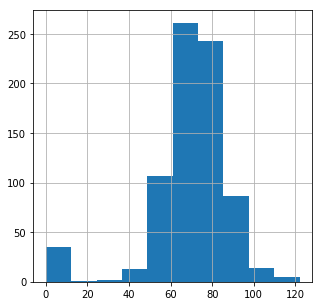

In [32]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Observando o gráfico, os dados parecem se comportar como uma distribuição normal

In [33]:
(diabetes['BloodPressure'].median(), diabetes['BloodPressure'].mean(),
 diabetes['BloodPressure'].median() - diabetes['BloodPressure'].mean())

#A diferença entre a média e mediana parecem ser pequenas

#então substuiremos os valores ausentes pela mediana

(72.0, 69.10546875, 2.89453125)

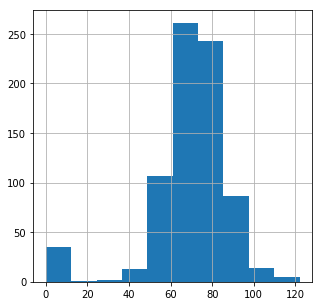

In [34]:
diabetes['BloodPressure'].hist(figsize=(5,5))

#Agora a distribuição parece mais com uma normal

In [35]:
#Imputando valores ausente com a mediana

dia_mean=diabetes['BloodPressure'].median()
diabetes['BloodPressure'].replace(0,dia_mean, inplace=True)

In [36]:
diabetes['BloodPressure'].value_counts(ascending=True)

24      1
102     1
95      1
114     1
61      1
122     1
38      1
40      1
104     2
55      2
46      2
30      2
108     2
100     3
98      3
106     3
110     3
96      4
44      4
48      5
94      6
85      6
65      7
92      8
75      8
54     11
52     11
56     12
50     13
58     21
86     21
90     22
84     23
88     25
82     30
66     30
62     34
60     37
76     39
80     40
64     43
78     45
68     45
74     52
70     57
72     79
Name: BloodPressure, dtype: int64

In [37]:
X_treino['BloodPressure']=(X_treino['BloodPressure']-diabetes['BloodPressure'].mean())/diabetes['BloodPressure'].std()
X_teste['BloodPressure']=(X_teste['BloodPressure']-diabetes['BloodPressure'].mean())/diabetes['BloodPressure'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,-5.984034,30,0,39.9,0.569,0.914873
73,4,0.253513,1.125377,20,270,35.1,0.231,-0.870806
352,3,-1.873307,0.794707,28,0,34.4,0.243,1.084937
497,2,-1.247772,-0.031969,15,76,30.1,0.547,-0.700742
145,0,-0.590960,0.216034,23,0,0.0,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,-1.189315,33,190,34.0,0.430,0.829840
324,2,-0.278192,0.216034,32,0,35.7,0.148,-1.040871
624,2,-0.403299,-0.693310,0,0,30.8,0.158,-1.040871
690,8,-0.434576,0.629371,0,0,24.6,0.856,0.064549
473,7,0.472450,1.456047,0,0,29.9,0.210,1.425067


# Análise tratamento da coluna SkinThickness

In [39]:
diabetes['SkinThickness'].isna().sum()

0

In [40]:
diabetes['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

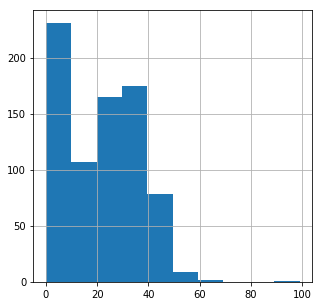

In [41]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Distribuição da coluna SkinThickness

In [42]:
(diabetes['SkinThickness'].median(), diabetes['SkinThickness'].mean(),diabetes['SkinThickness'].mode(),
 diabetes['SkinThickness'].median() - diabetes['SkinThickness'].mean())

#Vemos que diferença entre média e mediana é pequeno

#A moda é 0, o que não faz sentido. Vamos substituir esses valores pela mediana

(23.0, 20.536458333333332, 0    0
 dtype: int64, 2.463541666666668)

In [43]:
#Imputando os valores zero

diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median(),inplace=True)

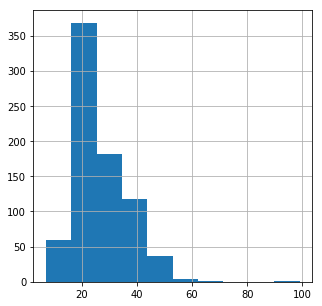

In [44]:
diabetes['SkinThickness'].hist(figsize=(5,5))

#Nova distribuição da coluna SkinThickness

In [45]:
X_treino['SkinThickness']=(X_treino['SkinThickness']-diabetes['SkinThickness'].mean())/diabetes['SkinThickness'].std()
X_teste['SkinThickness']=(X_teste['SkinThickness']-diabetes['SkinThickness'].mean())/diabetes['SkinThickness'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,-5.984034,0.288803,0,39.9,0.569,0.914873
73,4,0.253513,1.125377,-0.794737,270,35.1,0.231,-0.870806
352,3,-1.873307,0.794707,0.072095,0,34.4,0.243,1.084937
497,2,-1.247772,-0.031969,-1.336506,76,30.1,0.547,-0.700742
145,0,-0.590960,0.216034,-0.469675,0,0.0,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,-1.189315,0.613865,190,34.0,0.430,0.829840
324,2,-0.278192,0.216034,0.505511,0,35.7,0.148,-1.040871
624,2,-0.403299,-0.693310,-2.961815,0,30.8,0.158,-1.040871
690,8,-0.434576,0.629371,-2.961815,0,24.6,0.856,0.064549
473,7,0.472450,1.456047,-2.961815,0,29.9,0.210,1.425067


# Análise tratamento da coluna Insulin

In [47]:
diabetes['Insulin'].isna().sum()

0

In [48]:
diabetes['Insulin'].value_counts()

#Existem 374 valores iguais a zero

#Precisaremos tratar esses valores

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

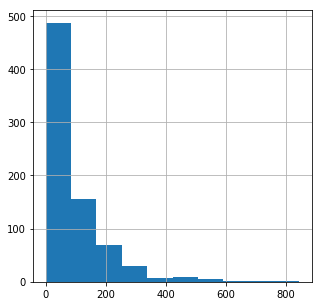

In [49]:
diabetes['Insulin'].hist(figsize=(5,5))

In [50]:
(diabetes['Insulin'].median(), diabetes['Insulin'].mean(),diabetes['Insulin'].mode(),
 diabetes['Insulin'].median() - diabetes['Insulin'].mean())

(30.5, 79.79947916666667, 0    0
 dtype: int64, -49.29947916666667)

In [51]:
diabetes['Insulin'].replace(0,diabetes['Insulin'].median(),inplace=True)

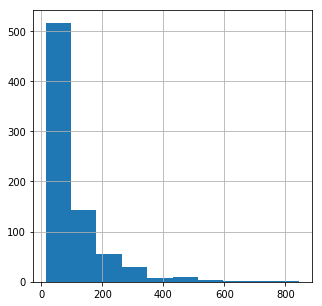

In [52]:
diabetes['Insulin'].hist(figsize=(5,5))

In [53]:
X_treino['Insulin']=(X_treino['Insulin']-diabetes['Insulin'].mean())/diabetes['Insulin'].std()
X_teste['Insulin']=(X_teste['Insulin']-diabetes['Insulin'].mean())/diabetes['Insulin'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,-5.984034,0.288803,-0.896774,39.9,0.569,0.914873
73,4,0.253513,1.125377,-0.794737,1.661314,35.1,0.231,-0.870806
352,3,-1.873307,0.794707,0.072095,-0.896774,34.4,0.243,1.084937
497,2,-1.247772,-0.031969,-1.336506,-0.176720,30.1,0.547,-0.700742
145,0,-0.590960,0.216034,-0.469675,-0.896774,0.0,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,-1.189315,0.613865,0.903362,34.0,0.430,0.829840
324,2,-0.278192,0.216034,0.505511,-0.896774,35.7,0.148,-1.040871
624,2,-0.403299,-0.693310,-2.961815,-0.896774,30.8,0.158,-1.040871
690,8,-0.434576,0.629371,-2.961815,-0.896774,24.6,0.856,0.064549
473,7,0.472450,1.456047,-2.961815,-0.896774,29.9,0.210,1.425067


# Análise tratamento da coluna BMI

In [55]:
diabetes['BMI'].isna().sum()

0

In [56]:
diabetes['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
        ..
32.1     1
52.9     1
31.3     1
45.7     1
42.8     1
Name: BMI, Length: 248, dtype: int64

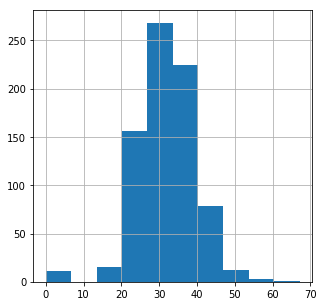

In [57]:
diabetes['BMI'].hist(figsize=(5,5))

In [58]:
diabetes['BMI'].replace(0,diabetes['BMI'].mean(),inplace=True)

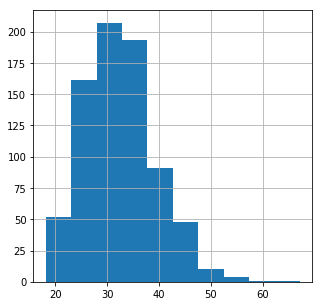

In [59]:
diabetes['BMI'].hist(figsize=(5,5))

In [60]:
X_treino['BMI']=(X_treino['BMI']-diabetes['BMI'].mean())/diabetes['BMI'].std()
X_teste['BMI']=(X_teste['BMI']-diabetes['BMI'].mean())/diabetes['BMI'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,-5.984034,0.288803,-0.896774,1.083460,0.569,0.914873
73,4,0.253513,1.125377,-0.794737,1.661314,0.385316,0.231,-0.870806
352,3,-1.873307,0.794707,0.072095,-0.896774,0.283504,0.243,1.084937
497,2,-1.247772,-0.031969,-1.336506,-0.176720,-0.341917,0.547,-0.700742
145,0,-0.590960,0.216034,-0.469675,-0.896774,-4.719861,0.572,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,-1.189315,0.613865,0.903362,0.225325,0.430,0.829840
324,2,-0.278192,0.216034,0.505511,-0.896774,0.472584,0.148,-1.040871
624,2,-0.403299,-0.693310,-2.961815,-0.896774,-0.240104,0.158,-1.040871
690,8,-0.434576,0.629371,-2.961815,-0.896774,-1.141873,0.856,0.064549
473,7,0.472450,1.456047,-2.961815,-0.896774,-0.371006,0.210,1.425067


# Análise e tratamento da coluna DiabetesPedigreeFunction

In [62]:
diabetes['DiabetesPedigreeFunction'].isna().sum()

0

In [63]:
diabetes['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

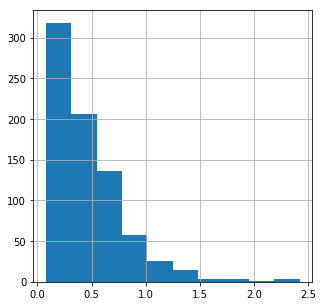

In [64]:
diabetes['DiabetesPedigreeFunction'].hist(figsize=(5,5))

In [65]:
X_treino['DiabetesPedigreeFunction']=(X_treino['DiabetesPedigreeFunction']-diabetes['DiabetesPedigreeFunction'].mean())/diabetes['DiabetesPedigreeFunction'].std()
X_teste['DiabetesPedigreeFunction']=(X_teste['DiabetesPedigreeFunction']-diabetes['DiabetesPedigreeFunction'].mean())/diabetes['DiabetesPedigreeFunction'].std()

C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\junio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
display(X_treino.head())
display(X_teste.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,0.253513,-5.984034,0.288803,-0.896774,1.083460,0.293134,0.914873
73,4,0.253513,1.125377,-0.794737,1.661314,0.385316,-0.727001,-0.870806
352,3,-1.873307,0.794707,0.072095,-0.896774,0.283504,-0.690783,1.084937
497,2,-1.247772,-0.031969,-1.336506,-0.176720,-0.341917,0.226735,-0.700742
145,0,-0.590960,0.216034,-0.469675,-0.896774,-4.719861,0.302189,-1.040871


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,-0.716067,-1.189315,0.613865,0.903362,0.225325,-0.126389,0.829840
324,2,-0.278192,0.216034,0.505511,-0.896774,0.472584,-0.977508,-1.040871
624,2,-0.403299,-0.693310,-2.961815,-0.896774,-0.240104,-0.947326,-1.040871
690,8,-0.434576,0.629371,-2.961815,-0.896774,-1.141873,1.159344,0.064549
473,7,0.472450,1.456047,-2.961815,-0.896774,-0.371006,-0.790382,1.425067


# **MODELO REGRESSÃO LOGÍSTICA**

**Instanciando o modelo de Regressão Logística**

In [67]:
diabetes_LR=LogisticRegression()

**Treinando o modelo de Regressão Logística**

In [68]:
diabetes_LR.fit(X_treino,y_treino)
import warnings
warnings.filterwarnings("ignore")

**Intercepto e coeficientes do modelo**

In [69]:
diabetes_LR.intercept_,diabetes_LR.coef_

(array([-1.09127859]),
 array([[ 0.06198316,  1.12727692, -0.14801442,  0.03996165, -0.1579338 ,
          0.68811047,  0.1676562 ,  0.43817871]]))

**Usando o modelo gerado para fazer previsões com os dados de teste**

In [70]:
diabetes_LR.predict(X_teste)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Atribuindo dos dados de previsão e reais a outras variáveis.

In [71]:
diabetes_pred = diabetes_LR.predict(X_teste)

In [72]:
diabetes_real = y_teste

**MATRIZ DE CONFUSÃO**

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo confundiu de uma classe para outra.

In [73]:
print(pd.crosstab(diabetes_real,diabetes_pred,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         95  28  123
1         24  45   69
All      119  73  192


A matriz de confusão mostrou que o modelo das 123 observações da que são 0 ele acertou 104 e "confunfiu" 19 como 1, já a para as 69 observações que são 1, o modelo acertou 41 e confundiu 28 como 0.

**CROSS VALIDATION**

Agora usaremos a validação cruzada que avalia a capacidade de generalização de um modelo, a partir de um conjunto de dados. Com isso iremos também obter a acurácia do modelo de regressão logística.

**Importando o módulo da Scikit-Learn**

In [74]:
from sklearn.model_selection import cross_val_predict

**Aplicando o cross validation**

In [75]:
resultados = cross_val_predict(diabetes_LR,features,classe,cv=10)

**Importando módulo Metrics**

In [76]:
from sklearn import metrics

**Obtendo a Acurácia do modelo**

In [77]:
print(metrics.accuracy_score(classe,resultados)*100)

77.34375


Como podemos ver a acurácia do modelo é de 77.34%, que a princípio é um bom nível de acurácia.

**MÉTRICAS DE AVALIAÇÃO**

A métricas de avaliação mais usadas para avaliar o modelos são a **precisão** e a **revocação**.

A **precisão** é a dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos e número de Falsos-positivos: VP/(VP+FP).

Já a **revocação** é dada pelo número de Verdadeiros-positivos (VP) dividido pela soma do número de Verdadeiros-positivos (VP) e número de Verdadeiros-negativos (VN): VP/(VP+VN).

In [78]:
resultados=cross_val_predict(diabetes_LR,features,classe,cv=10)
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados,valor_classe))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.56      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.77      0.77       768



Podemos observar que a precisão média é de 76%, sendo 79% para classe 0 e 73% para classe 1. A revocação (recall) é maior para a classe 0 (89%) e apenas 55% para a classe 1. O f1-score, que é a média harmônica entre a precisão e revocação, também é maior para classe 0 (83%) do que para a classe 1 (63%). 

# MODELO SUPPORT VECTOR MACHINE

**Instanciando o modelo SVM**

In [79]:
diabetes_SVM=svm.SVC()

diabetes_SVM.fit(X_treino,y_treino)

diabetes_SVM.predict(X_teste)

diabetes_pred2 = diabetes_SVM.predict(X_teste)

diabetes_real2 = y_teste

**MATRIZ DE CONFUSÃO**

In [80]:
print(pd.crosstab(diabetes_real2,diabetes_pred2,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0        101  22  123
1         28  41   69
All      129  63  192


**CROSS VALIDATION**

In [81]:
resultados2 = cross_val_predict(diabetes_SVM,features,classe,cv=10)

**Acurácia do modelo SVM**

In [82]:
print(metrics.accuracy_score(classe,resultados2)*100)

75.78125


**MÉTRICAS DE AVALIAÇÃO**

In [83]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados2,valor_classe))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       500
           1       0.74      0.47      0.58       268

    accuracy                           0.76       768
   macro avg       0.75      0.69      0.70       768
weighted avg       0.76      0.76      0.74       768



# CatBoost

In [84]:
from catboost import CatBoostClassifier

diabetes_cat=CatBoostClassifier().fit(X_treino,y_treino)

diabetes_cat.predict(X_teste)

diabetes_pred3 = diabetes_cat.predict(X_teste)

diabetes_real3 =y_teste

Learning rate set to 0.00814
0:	learn: 0.6885419	total: 85ms	remaining: 1m 24s
1:	learn: 0.6847859	total: 86.4ms	remaining: 43.1s
2:	learn: 0.6807988	total: 88.1ms	remaining: 29.3s
3:	learn: 0.6769717	total: 89.5ms	remaining: 22.3s
4:	learn: 0.6734590	total: 91.6ms	remaining: 18.2s
5:	learn: 0.6693569	total: 93.2ms	remaining: 15.4s
6:	learn: 0.6655449	total: 95.2ms	remaining: 13.5s
7:	learn: 0.6615448	total: 97.1ms	remaining: 12s
8:	learn: 0.6576961	total: 98.4ms	remaining: 10.8s
9:	learn: 0.6535749	total: 99.8ms	remaining: 9.88s
10:	learn: 0.6491346	total: 101ms	remaining: 9.1s
11:	learn: 0.6450929	total: 103ms	remaining: 8.5s
12:	learn: 0.6408079	total: 105ms	remaining: 7.94s
13:	learn: 0.6371720	total: 106ms	remaining: 7.48s
14:	learn: 0.6332586	total: 108ms	remaining: 7.06s
15:	learn: 0.6299835	total: 109ms	remaining: 6.71s
16:	learn: 0.6257288	total: 111ms	remaining: 6.44s
17:	learn: 0.6232125	total: 113ms	remaining: 6.17s
18:	learn: 0.6197688	total: 115ms	remaining: 5.93s
19:	lea

181:	learn: 0.3969799	total: 486ms	remaining: 2.19s
182:	learn: 0.3964372	total: 490ms	remaining: 2.19s
183:	learn: 0.3956354	total: 493ms	remaining: 2.18s
184:	learn: 0.3948090	total: 496ms	remaining: 2.18s
185:	learn: 0.3941992	total: 506ms	remaining: 2.21s
186:	learn: 0.3934857	total: 519ms	remaining: 2.25s
187:	learn: 0.3929830	total: 521ms	remaining: 2.25s
188:	learn: 0.3923645	total: 523ms	remaining: 2.25s
189:	learn: 0.3915497	total: 525ms	remaining: 2.24s
190:	learn: 0.3910108	total: 528ms	remaining: 2.23s
191:	learn: 0.3903994	total: 530ms	remaining: 2.23s
192:	learn: 0.3897892	total: 532ms	remaining: 2.22s
193:	learn: 0.3891703	total: 536ms	remaining: 2.23s
194:	learn: 0.3884944	total: 538ms	remaining: 2.22s
195:	learn: 0.3879157	total: 540ms	remaining: 2.22s
196:	learn: 0.3874531	total: 543ms	remaining: 2.21s
197:	learn: 0.3871113	total: 545ms	remaining: 2.21s
198:	learn: 0.3866825	total: 547ms	remaining: 2.2s
199:	learn: 0.3860437	total: 549ms	remaining: 2.2s
200:	learn: 0.

355:	learn: 0.3274723	total: 955ms	remaining: 1.73s
356:	learn: 0.3272317	total: 957ms	remaining: 1.72s
357:	learn: 0.3267535	total: 959ms	remaining: 1.72s
358:	learn: 0.3266250	total: 961ms	remaining: 1.72s
359:	learn: 0.3264252	total: 964ms	remaining: 1.71s
360:	learn: 0.3262315	total: 966ms	remaining: 1.71s
361:	learn: 0.3258554	total: 969ms	remaining: 1.71s
362:	learn: 0.3256599	total: 972ms	remaining: 1.71s
363:	learn: 0.3255101	total: 974ms	remaining: 1.7s
364:	learn: 0.3251140	total: 977ms	remaining: 1.7s
365:	learn: 0.3249501	total: 980ms	remaining: 1.7s
366:	learn: 0.3246732	total: 982ms	remaining: 1.69s
367:	learn: 0.3245642	total: 984ms	remaining: 1.69s
368:	learn: 0.3242551	total: 986ms	remaining: 1.69s
369:	learn: 0.3240547	total: 989ms	remaining: 1.68s
370:	learn: 0.3238919	total: 991ms	remaining: 1.68s
371:	learn: 0.3234057	total: 994ms	remaining: 1.68s
372:	learn: 0.3231210	total: 997ms	remaining: 1.68s
373:	learn: 0.3230470	total: 999ms	remaining: 1.67s
374:	learn: 0.3

544:	learn: 0.2807458	total: 1.44s	remaining: 1.2s
545:	learn: 0.2804344	total: 1.44s	remaining: 1.2s
546:	learn: 0.2801468	total: 1.44s	remaining: 1.19s
547:	learn: 0.2800265	total: 1.44s	remaining: 1.19s
548:	learn: 0.2797795	total: 1.45s	remaining: 1.19s
549:	learn: 0.2794832	total: 1.45s	remaining: 1.18s
550:	learn: 0.2791773	total: 1.45s	remaining: 1.18s
551:	learn: 0.2788803	total: 1.45s	remaining: 1.18s
552:	learn: 0.2787052	total: 1.45s	remaining: 1.18s
553:	learn: 0.2783640	total: 1.46s	remaining: 1.17s
554:	learn: 0.2782348	total: 1.46s	remaining: 1.17s
555:	learn: 0.2778271	total: 1.46s	remaining: 1.17s
556:	learn: 0.2775055	total: 1.47s	remaining: 1.17s
557:	learn: 0.2773434	total: 1.47s	remaining: 1.16s
558:	learn: 0.2773174	total: 1.47s	remaining: 1.16s
559:	learn: 0.2770885	total: 1.47s	remaining: 1.16s
560:	learn: 0.2766606	total: 1.47s	remaining: 1.15s
561:	learn: 0.2764865	total: 1.48s	remaining: 1.15s
562:	learn: 0.2761021	total: 1.48s	remaining: 1.15s
563:	learn: 0.

730:	learn: 0.2420158	total: 1.9s	remaining: 700ms
731:	learn: 0.2419681	total: 1.9s	remaining: 697ms
732:	learn: 0.2417663	total: 1.91s	remaining: 695ms
733:	learn: 0.2416476	total: 1.91s	remaining: 692ms
734:	learn: 0.2415271	total: 1.91s	remaining: 689ms
735:	learn: 0.2412809	total: 1.91s	remaining: 686ms
736:	learn: 0.2411055	total: 1.92s	remaining: 684ms
737:	learn: 0.2409218	total: 1.92s	remaining: 681ms
738:	learn: 0.2407901	total: 1.92s	remaining: 678ms
739:	learn: 0.2405207	total: 1.92s	remaining: 675ms
740:	learn: 0.2404058	total: 1.92s	remaining: 672ms
741:	learn: 0.2401798	total: 1.93s	remaining: 669ms
742:	learn: 0.2400696	total: 1.93s	remaining: 667ms
743:	learn: 0.2397395	total: 1.93s	remaining: 664ms
744:	learn: 0.2394422	total: 1.93s	remaining: 661ms
745:	learn: 0.2392945	total: 1.93s	remaining: 658ms
746:	learn: 0.2389783	total: 1.93s	remaining: 655ms
747:	learn: 0.2388974	total: 1.94s	remaining: 652ms
748:	learn: 0.2387361	total: 1.94s	remaining: 649ms
749:	learn: 0.

943:	learn: 0.2057421	total: 2.39s	remaining: 142ms
944:	learn: 0.2055711	total: 2.39s	remaining: 139ms
945:	learn: 0.2054743	total: 2.4s	remaining: 137ms
946:	learn: 0.2053559	total: 2.4s	remaining: 135ms
947:	learn: 0.2052989	total: 2.41s	remaining: 132ms
948:	learn: 0.2051709	total: 2.41s	remaining: 129ms
949:	learn: 0.2049378	total: 2.41s	remaining: 127ms
950:	learn: 0.2048110	total: 2.41s	remaining: 124ms
951:	learn: 0.2045561	total: 2.41s	remaining: 122ms
952:	learn: 0.2044044	total: 2.42s	remaining: 119ms
953:	learn: 0.2041804	total: 2.42s	remaining: 117ms
954:	learn: 0.2040871	total: 2.42s	remaining: 114ms
955:	learn: 0.2038161	total: 2.42s	remaining: 111ms
956:	learn: 0.2036337	total: 2.42s	remaining: 109ms
957:	learn: 0.2034686	total: 2.43s	remaining: 106ms
958:	learn: 0.2033631	total: 2.43s	remaining: 104ms
959:	learn: 0.2031464	total: 2.43s	remaining: 101ms
960:	learn: 0.2030805	total: 2.43s	remaining: 98.7ms
961:	learn: 0.2029808	total: 2.43s	remaining: 96.2ms
962:	learn: 

**MATRIZ DE CONFUSÃO**

In [85]:
print(pd.crosstab(diabetes_real3,diabetes_pred3,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         97  26  123
1         22  47   69
All      119  73  192


**CROSS VALIDATION**

In [86]:
resultados3 = cross_val_predict(diabetes_cat,features,classe,cv=10)

Learning rate set to 0.008798
0:	learn: 0.6880601	total: 2.75ms	remaining: 2.74s
1:	learn: 0.6842717	total: 5.46ms	remaining: 2.73s
2:	learn: 0.6801652	total: 7.92ms	remaining: 2.63s
3:	learn: 0.6755463	total: 10.1ms	remaining: 2.5s
4:	learn: 0.6722337	total: 12.1ms	remaining: 2.4s
5:	learn: 0.6674928	total: 14.3ms	remaining: 2.36s
6:	learn: 0.6634237	total: 18.7ms	remaining: 2.65s
7:	learn: 0.6599207	total: 22.5ms	remaining: 2.78s
8:	learn: 0.6553927	total: 24.6ms	remaining: 2.71s
9:	learn: 0.6523928	total: 26.7ms	remaining: 2.65s
10:	learn: 0.6482836	total: 29.4ms	remaining: 2.65s
11:	learn: 0.6448238	total: 32.6ms	remaining: 2.68s
12:	learn: 0.6409828	total: 36.1ms	remaining: 2.74s
13:	learn: 0.6372534	total: 39.7ms	remaining: 2.8s
14:	learn: 0.6335936	total: 43.1ms	remaining: 2.83s
15:	learn: 0.6305338	total: 48ms	remaining: 2.95s
16:	learn: 0.6271564	total: 51.1ms	remaining: 2.96s
17:	learn: 0.6241313	total: 54ms	remaining: 2.94s
18:	learn: 0.6203352	total: 57.9ms	remaining: 2.99s

169:	learn: 0.4120938	total: 470ms	remaining: 2.29s
170:	learn: 0.4114441	total: 472ms	remaining: 2.29s
171:	learn: 0.4104721	total: 475ms	remaining: 2.29s
172:	learn: 0.4100383	total: 478ms	remaining: 2.28s
173:	learn: 0.4094178	total: 481ms	remaining: 2.28s
174:	learn: 0.4087794	total: 483ms	remaining: 2.28s
175:	learn: 0.4083511	total: 485ms	remaining: 2.27s
176:	learn: 0.4077420	total: 487ms	remaining: 2.27s
177:	learn: 0.4070674	total: 490ms	remaining: 2.26s
178:	learn: 0.4065181	total: 493ms	remaining: 2.26s
179:	learn: 0.4062151	total: 495ms	remaining: 2.26s
180:	learn: 0.4057236	total: 499ms	remaining: 2.26s
181:	learn: 0.4050254	total: 501ms	remaining: 2.25s
182:	learn: 0.4043829	total: 504ms	remaining: 2.25s
183:	learn: 0.4035268	total: 506ms	remaining: 2.25s
184:	learn: 0.4027666	total: 508ms	remaining: 2.24s
185:	learn: 0.4023209	total: 511ms	remaining: 2.23s
186:	learn: 0.4016545	total: 514ms	remaining: 2.23s
187:	learn: 0.4009105	total: 517ms	remaining: 2.23s
188:	learn: 

343:	learn: 0.3415714	total: 934ms	remaining: 1.78s
344:	learn: 0.3413102	total: 939ms	remaining: 1.78s
345:	learn: 0.3411382	total: 941ms	remaining: 1.78s
346:	learn: 0.3408563	total: 946ms	remaining: 1.78s
347:	learn: 0.3406215	total: 948ms	remaining: 1.77s
348:	learn: 0.3403416	total: 949ms	remaining: 1.77s
349:	learn: 0.3400989	total: 952ms	remaining: 1.77s
350:	learn: 0.3397201	total: 955ms	remaining: 1.76s
351:	learn: 0.3393839	total: 957ms	remaining: 1.76s
352:	learn: 0.3391270	total: 960ms	remaining: 1.76s
353:	learn: 0.3387932	total: 962ms	remaining: 1.76s
354:	learn: 0.3384380	total: 965ms	remaining: 1.75s
355:	learn: 0.3380068	total: 967ms	remaining: 1.75s
356:	learn: 0.3378390	total: 969ms	remaining: 1.75s
357:	learn: 0.3374953	total: 971ms	remaining: 1.74s
358:	learn: 0.3372832	total: 973ms	remaining: 1.74s
359:	learn: 0.3371217	total: 974ms	remaining: 1.73s
360:	learn: 0.3368148	total: 976ms	remaining: 1.73s
361:	learn: 0.3366499	total: 979ms	remaining: 1.73s
362:	learn: 

551:	learn: 0.2937365	total: 1.41s	remaining: 1.14s
552:	learn: 0.2934233	total: 1.41s	remaining: 1.14s
553:	learn: 0.2933346	total: 1.41s	remaining: 1.14s
554:	learn: 0.2932058	total: 1.42s	remaining: 1.14s
555:	learn: 0.2930536	total: 1.42s	remaining: 1.13s
556:	learn: 0.2926148	total: 1.42s	remaining: 1.13s
557:	learn: 0.2924029	total: 1.43s	remaining: 1.13s
558:	learn: 0.2922598	total: 1.43s	remaining: 1.13s
559:	learn: 0.2920985	total: 1.43s	remaining: 1.12s
560:	learn: 0.2920342	total: 1.43s	remaining: 1.12s
561:	learn: 0.2919264	total: 1.44s	remaining: 1.12s
562:	learn: 0.2918021	total: 1.44s	remaining: 1.12s
563:	learn: 0.2915840	total: 1.44s	remaining: 1.12s
564:	learn: 0.2914222	total: 1.45s	remaining: 1.11s
565:	learn: 0.2913354	total: 1.45s	remaining: 1.11s
566:	learn: 0.2912349	total: 1.45s	remaining: 1.11s
567:	learn: 0.2910732	total: 1.45s	remaining: 1.1s
568:	learn: 0.2909139	total: 1.46s	remaining: 1.1s
569:	learn: 0.2908181	total: 1.46s	remaining: 1.1s
570:	learn: 0.2

740:	learn: 0.2583870	total: 1.88s	remaining: 659ms
741:	learn: 0.2581194	total: 1.89s	remaining: 656ms
742:	learn: 0.2577446	total: 1.89s	remaining: 654ms
743:	learn: 0.2575382	total: 1.89s	remaining: 651ms
744:	learn: 0.2573845	total: 1.89s	remaining: 648ms
745:	learn: 0.2572148	total: 1.9s	remaining: 646ms
746:	learn: 0.2570343	total: 1.9s	remaining: 644ms
747:	learn: 0.2568765	total: 1.9s	remaining: 641ms
748:	learn: 0.2566902	total: 1.9s	remaining: 638ms
749:	learn: 0.2565187	total: 1.91s	remaining: 636ms
750:	learn: 0.2564509	total: 1.91s	remaining: 633ms
751:	learn: 0.2562916	total: 1.91s	remaining: 631ms
752:	learn: 0.2561483	total: 1.92s	remaining: 628ms
753:	learn: 0.2559400	total: 1.92s	remaining: 626ms
754:	learn: 0.2557333	total: 1.93s	remaining: 625ms
755:	learn: 0.2554859	total: 1.93s	remaining: 622ms
756:	learn: 0.2553406	total: 1.93s	remaining: 620ms
757:	learn: 0.2551483	total: 1.93s	remaining: 617ms
758:	learn: 0.2550341	total: 1.94s	remaining: 614ms
759:	learn: 0.25

901:	learn: 0.2293452	total: 2.31s	remaining: 251ms
902:	learn: 0.2292151	total: 2.31s	remaining: 248ms
903:	learn: 0.2290243	total: 2.31s	remaining: 246ms
904:	learn: 0.2286966	total: 2.32s	remaining: 243ms
905:	learn: 0.2284601	total: 2.32s	remaining: 241ms
906:	learn: 0.2283263	total: 2.32s	remaining: 238ms
907:	learn: 0.2280241	total: 2.32s	remaining: 236ms
908:	learn: 0.2278605	total: 2.33s	remaining: 233ms
909:	learn: 0.2277895	total: 2.33s	remaining: 230ms
910:	learn: 0.2275363	total: 2.33s	remaining: 228ms
911:	learn: 0.2273446	total: 2.33s	remaining: 225ms
912:	learn: 0.2271687	total: 2.33s	remaining: 223ms
913:	learn: 0.2270021	total: 2.34s	remaining: 220ms
914:	learn: 0.2267702	total: 2.34s	remaining: 217ms
915:	learn: 0.2266468	total: 2.34s	remaining: 215ms
916:	learn: 0.2265147	total: 2.34s	remaining: 212ms
917:	learn: 0.2263568	total: 2.35s	remaining: 210ms
918:	learn: 0.2261599	total: 2.35s	remaining: 207ms
919:	learn: 0.2261507	total: 2.35s	remaining: 204ms
920:	learn: 

62:	learn: 0.5197347	total: 156ms	remaining: 2.31s
63:	learn: 0.5179843	total: 158ms	remaining: 2.31s
64:	learn: 0.5161105	total: 160ms	remaining: 2.3s
65:	learn: 0.5146085	total: 162ms	remaining: 2.29s
66:	learn: 0.5126005	total: 164ms	remaining: 2.29s
67:	learn: 0.5108448	total: 166ms	remaining: 2.28s
68:	learn: 0.5092268	total: 168ms	remaining: 2.27s
69:	learn: 0.5075412	total: 172ms	remaining: 2.28s
70:	learn: 0.5057539	total: 173ms	remaining: 2.27s
71:	learn: 0.5040642	total: 175ms	remaining: 2.26s
72:	learn: 0.5027737	total: 177ms	remaining: 2.25s
73:	learn: 0.5013806	total: 179ms	remaining: 2.24s
74:	learn: 0.4999186	total: 180ms	remaining: 2.23s
75:	learn: 0.4982984	total: 183ms	remaining: 2.23s
76:	learn: 0.4967444	total: 186ms	remaining: 2.22s
77:	learn: 0.4952924	total: 188ms	remaining: 2.22s
78:	learn: 0.4941241	total: 190ms	remaining: 2.21s
79:	learn: 0.4928200	total: 193ms	remaining: 2.22s
80:	learn: 0.4916316	total: 195ms	remaining: 2.21s
81:	learn: 0.4905503	total: 198m

270:	learn: 0.3663954	total: 637ms	remaining: 1.71s
271:	learn: 0.3658151	total: 639ms	remaining: 1.71s
272:	learn: 0.3655247	total: 642ms	remaining: 1.71s
273:	learn: 0.3652129	total: 644ms	remaining: 1.71s
274:	learn: 0.3648988	total: 646ms	remaining: 1.7s
275:	learn: 0.3644367	total: 648ms	remaining: 1.7s
276:	learn: 0.3641317	total: 650ms	remaining: 1.7s
277:	learn: 0.3635918	total: 653ms	remaining: 1.7s
278:	learn: 0.3631129	total: 655ms	remaining: 1.69s
279:	learn: 0.3628119	total: 656ms	remaining: 1.69s
280:	learn: 0.3624764	total: 658ms	remaining: 1.68s
281:	learn: 0.3620339	total: 662ms	remaining: 1.69s
282:	learn: 0.3616360	total: 664ms	remaining: 1.68s
283:	learn: 0.3612501	total: 665ms	remaining: 1.68s
284:	learn: 0.3607357	total: 668ms	remaining: 1.67s
285:	learn: 0.3602922	total: 669ms	remaining: 1.67s
286:	learn: 0.3599428	total: 672ms	remaining: 1.67s
287:	learn: 0.3597270	total: 674ms	remaining: 1.67s
288:	learn: 0.3593123	total: 676ms	remaining: 1.66s
289:	learn: 0.35

471:	learn: 0.3115593	total: 1.11s	remaining: 1.24s
472:	learn: 0.3112373	total: 1.11s	remaining: 1.24s
473:	learn: 0.3110061	total: 1.12s	remaining: 1.24s
474:	learn: 0.3107806	total: 1.12s	remaining: 1.24s
475:	learn: 0.3106453	total: 1.12s	remaining: 1.24s
476:	learn: 0.3104005	total: 1.13s	remaining: 1.24s
477:	learn: 0.3102398	total: 1.13s	remaining: 1.24s
478:	learn: 0.3100630	total: 1.14s	remaining: 1.24s
479:	learn: 0.3098067	total: 1.14s	remaining: 1.24s
480:	learn: 0.3096776	total: 1.15s	remaining: 1.24s
481:	learn: 0.3093079	total: 1.15s	remaining: 1.24s
482:	learn: 0.3089096	total: 1.16s	remaining: 1.24s
483:	learn: 0.3087966	total: 1.16s	remaining: 1.24s
484:	learn: 0.3084418	total: 1.16s	remaining: 1.23s
485:	learn: 0.3080984	total: 1.17s	remaining: 1.23s
486:	learn: 0.3077976	total: 1.17s	remaining: 1.23s
487:	learn: 0.3076396	total: 1.17s	remaining: 1.23s
488:	learn: 0.3075145	total: 1.17s	remaining: 1.23s
489:	learn: 0.3073714	total: 1.18s	remaining: 1.22s
490:	learn: 

695:	learn: 0.2669320	total: 1.73s	remaining: 756ms
696:	learn: 0.2665086	total: 1.73s	remaining: 753ms
697:	learn: 0.2664171	total: 1.74s	remaining: 751ms
698:	learn: 0.2661377	total: 1.74s	remaining: 749ms
699:	learn: 0.2659749	total: 1.74s	remaining: 746ms
700:	learn: 0.2658000	total: 1.74s	remaining: 743ms
701:	learn: 0.2654820	total: 1.75s	remaining: 741ms
702:	learn: 0.2654170	total: 1.75s	remaining: 738ms
703:	learn: 0.2652588	total: 1.75s	remaining: 735ms
704:	learn: 0.2651647	total: 1.75s	remaining: 733ms
705:	learn: 0.2649297	total: 1.75s	remaining: 730ms
706:	learn: 0.2646182	total: 1.76s	remaining: 728ms
707:	learn: 0.2644771	total: 1.76s	remaining: 725ms
708:	learn: 0.2642850	total: 1.76s	remaining: 722ms
709:	learn: 0.2641105	total: 1.76s	remaining: 719ms
710:	learn: 0.2638087	total: 1.76s	remaining: 717ms
711:	learn: 0.2635951	total: 1.77s	remaining: 714ms
712:	learn: 0.2633157	total: 1.77s	remaining: 712ms
713:	learn: 0.2632070	total: 1.77s	remaining: 710ms
714:	learn: 

917:	learn: 0.2271339	total: 2.21s	remaining: 198ms
918:	learn: 0.2269556	total: 2.21s	remaining: 195ms
919:	learn: 0.2268868	total: 2.22s	remaining: 193ms
920:	learn: 0.2267856	total: 2.22s	remaining: 190ms
921:	learn: 0.2265008	total: 2.22s	remaining: 188ms
922:	learn: 0.2263162	total: 2.23s	remaining: 186ms
923:	learn: 0.2261748	total: 2.23s	remaining: 183ms
924:	learn: 0.2260274	total: 2.23s	remaining: 181ms
925:	learn: 0.2258011	total: 2.23s	remaining: 178ms
926:	learn: 0.2257221	total: 2.23s	remaining: 176ms
927:	learn: 0.2254891	total: 2.23s	remaining: 173ms
928:	learn: 0.2254368	total: 2.24s	remaining: 171ms
929:	learn: 0.2252193	total: 2.24s	remaining: 169ms
930:	learn: 0.2250925	total: 2.24s	remaining: 166ms
931:	learn: 0.2249430	total: 2.24s	remaining: 164ms
932:	learn: 0.2248349	total: 2.25s	remaining: 161ms
933:	learn: 0.2246784	total: 2.25s	remaining: 159ms
934:	learn: 0.2245254	total: 2.25s	remaining: 156ms
935:	learn: 0.2244432	total: 2.25s	remaining: 154ms
936:	learn: 

134:	learn: 0.4355878	total: 322ms	remaining: 2.07s
135:	learn: 0.4345832	total: 324ms	remaining: 2.06s
136:	learn: 0.4336918	total: 327ms	remaining: 2.06s
137:	learn: 0.4327829	total: 330ms	remaining: 2.06s
138:	learn: 0.4321518	total: 332ms	remaining: 2.06s
139:	learn: 0.4315883	total: 333ms	remaining: 2.05s
140:	learn: 0.4306248	total: 336ms	remaining: 2.04s
141:	learn: 0.4299177	total: 338ms	remaining: 2.04s
142:	learn: 0.4293918	total: 340ms	remaining: 2.04s
143:	learn: 0.4287051	total: 342ms	remaining: 2.03s
144:	learn: 0.4281224	total: 344ms	remaining: 2.03s
145:	learn: 0.4270365	total: 346ms	remaining: 2.03s
146:	learn: 0.4264665	total: 348ms	remaining: 2.02s
147:	learn: 0.4257848	total: 350ms	remaining: 2.02s
148:	learn: 0.4251617	total: 352ms	remaining: 2.01s
149:	learn: 0.4245112	total: 354ms	remaining: 2s
150:	learn: 0.4236980	total: 355ms	remaining: 2s
151:	learn: 0.4231527	total: 357ms	remaining: 1.99s
152:	learn: 0.4220936	total: 359ms	remaining: 1.99s
153:	learn: 0.4214

355:	learn: 0.3361983	total: 800ms	remaining: 1.45s
356:	learn: 0.3360144	total: 802ms	remaining: 1.44s
357:	learn: 0.3358499	total: 804ms	remaining: 1.44s
358:	learn: 0.3356513	total: 807ms	remaining: 1.44s
359:	learn: 0.3354617	total: 808ms	remaining: 1.44s
360:	learn: 0.3352723	total: 809ms	remaining: 1.43s
361:	learn: 0.3350864	total: 812ms	remaining: 1.43s
362:	learn: 0.3349340	total: 814ms	remaining: 1.43s
363:	learn: 0.3345858	total: 816ms	remaining: 1.43s
364:	learn: 0.3344048	total: 818ms	remaining: 1.42s
365:	learn: 0.3342241	total: 819ms	remaining: 1.42s
366:	learn: 0.3340363	total: 822ms	remaining: 1.42s
367:	learn: 0.3337261	total: 824ms	remaining: 1.42s
368:	learn: 0.3333628	total: 826ms	remaining: 1.41s
369:	learn: 0.3332715	total: 827ms	remaining: 1.41s
370:	learn: 0.3328528	total: 829ms	remaining: 1.4s
371:	learn: 0.3323927	total: 831ms	remaining: 1.4s
372:	learn: 0.3321262	total: 833ms	remaining: 1.4s
373:	learn: 0.3320057	total: 834ms	remaining: 1.4s
374:	learn: 0.33

528:	learn: 0.2950212	total: 1.12s	remaining: 999ms
529:	learn: 0.2948386	total: 1.12s	remaining: 997ms
530:	learn: 0.2946811	total: 1.13s	remaining: 995ms
531:	learn: 0.2944491	total: 1.13s	remaining: 992ms
532:	learn: 0.2941820	total: 1.13s	remaining: 990ms
533:	learn: 0.2939404	total: 1.13s	remaining: 988ms
534:	learn: 0.2936897	total: 1.13s	remaining: 985ms
535:	learn: 0.2935707	total: 1.14s	remaining: 983ms
536:	learn: 0.2934480	total: 1.14s	remaining: 980ms
537:	learn: 0.2932822	total: 1.14s	remaining: 978ms
538:	learn: 0.2930162	total: 1.14s	remaining: 976ms
539:	learn: 0.2929217	total: 1.14s	remaining: 974ms
540:	learn: 0.2927132	total: 1.14s	remaining: 971ms
541:	learn: 0.2923114	total: 1.15s	remaining: 969ms
542:	learn: 0.2921556	total: 1.15s	remaining: 966ms
543:	learn: 0.2919660	total: 1.15s	remaining: 964ms
544:	learn: 0.2917166	total: 1.15s	remaining: 961ms
545:	learn: 0.2915508	total: 1.15s	remaining: 959ms
546:	learn: 0.2912769	total: 1.16s	remaining: 957ms
547:	learn: 

695:	learn: 0.2617337	total: 1.44s	remaining: 630ms
696:	learn: 0.2615975	total: 1.44s	remaining: 628ms
697:	learn: 0.2614135	total: 1.45s	remaining: 626ms
698:	learn: 0.2612184	total: 1.45s	remaining: 624ms
699:	learn: 0.2610267	total: 1.45s	remaining: 622ms
700:	learn: 0.2608003	total: 1.45s	remaining: 620ms
701:	learn: 0.2606825	total: 1.46s	remaining: 618ms
702:	learn: 0.2605517	total: 1.46s	remaining: 616ms
703:	learn: 0.2604017	total: 1.46s	remaining: 614ms
704:	learn: 0.2601959	total: 1.46s	remaining: 612ms
705:	learn: 0.2600853	total: 1.46s	remaining: 610ms
706:	learn: 0.2598665	total: 1.47s	remaining: 608ms
707:	learn: 0.2598070	total: 1.47s	remaining: 605ms
708:	learn: 0.2595786	total: 1.47s	remaining: 603ms
709:	learn: 0.2594151	total: 1.47s	remaining: 601ms
710:	learn: 0.2592593	total: 1.47s	remaining: 599ms
711:	learn: 0.2590998	total: 1.47s	remaining: 597ms
712:	learn: 0.2589736	total: 1.48s	remaining: 595ms
713:	learn: 0.2585665	total: 1.48s	remaining: 593ms
714:	learn: 

933:	learn: 0.2189046	total: 1.92s	remaining: 136ms
934:	learn: 0.2188411	total: 1.93s	remaining: 134ms
935:	learn: 0.2187186	total: 1.93s	remaining: 132ms
936:	learn: 0.2186694	total: 1.93s	remaining: 130ms
937:	learn: 0.2186295	total: 1.93s	remaining: 128ms
938:	learn: 0.2184959	total: 1.94s	remaining: 126ms
939:	learn: 0.2183343	total: 1.94s	remaining: 124ms
940:	learn: 0.2181324	total: 1.94s	remaining: 122ms
941:	learn: 0.2180613	total: 1.94s	remaining: 119ms
942:	learn: 0.2179795	total: 1.94s	remaining: 117ms
943:	learn: 0.2178394	total: 1.95s	remaining: 115ms
944:	learn: 0.2177128	total: 1.95s	remaining: 113ms
945:	learn: 0.2174860	total: 1.95s	remaining: 111ms
946:	learn: 0.2173289	total: 1.95s	remaining: 109ms
947:	learn: 0.2172074	total: 1.95s	remaining: 107ms
948:	learn: 0.2170838	total: 1.95s	remaining: 105ms
949:	learn: 0.2170342	total: 1.96s	remaining: 103ms
950:	learn: 0.2169546	total: 1.96s	remaining: 101ms
951:	learn: 0.2168114	total: 1.96s	remaining: 98.8ms
952:	learn:

143:	learn: 0.4193260	total: 311ms	remaining: 1.85s
144:	learn: 0.4187550	total: 313ms	remaining: 1.85s
145:	learn: 0.4175256	total: 315ms	remaining: 1.84s
146:	learn: 0.4170641	total: 316ms	remaining: 1.84s
147:	learn: 0.4165048	total: 319ms	remaining: 1.83s
148:	learn: 0.4157769	total: 322ms	remaining: 1.84s
149:	learn: 0.4152226	total: 324ms	remaining: 1.83s
150:	learn: 0.4143147	total: 325ms	remaining: 1.83s
151:	learn: 0.4137913	total: 327ms	remaining: 1.83s
152:	learn: 0.4129133	total: 330ms	remaining: 1.82s
153:	learn: 0.4124930	total: 332ms	remaining: 1.82s
154:	learn: 0.4120371	total: 334ms	remaining: 1.82s
155:	learn: 0.4115868	total: 335ms	remaining: 1.81s
156:	learn: 0.4109626	total: 338ms	remaining: 1.82s
157:	learn: 0.4107310	total: 340ms	remaining: 1.81s
158:	learn: 0.4099044	total: 342ms	remaining: 1.81s
159:	learn: 0.4094754	total: 344ms	remaining: 1.8s
160:	learn: 0.4090725	total: 346ms	remaining: 1.8s
161:	learn: 0.4083108	total: 348ms	remaining: 1.8s
162:	learn: 0.4

315:	learn: 0.3463629	total: 633ms	remaining: 1.37s
316:	learn: 0.3460752	total: 635ms	remaining: 1.37s
317:	learn: 0.3457440	total: 639ms	remaining: 1.37s
318:	learn: 0.3453522	total: 641ms	remaining: 1.37s
319:	learn: 0.3451889	total: 643ms	remaining: 1.37s
320:	learn: 0.3449977	total: 645ms	remaining: 1.36s
321:	learn: 0.3447286	total: 648ms	remaining: 1.36s
322:	learn: 0.3444709	total: 649ms	remaining: 1.36s
323:	learn: 0.3441014	total: 651ms	remaining: 1.36s
324:	learn: 0.3438115	total: 653ms	remaining: 1.36s
325:	learn: 0.3435462	total: 655ms	remaining: 1.35s
326:	learn: 0.3432912	total: 658ms	remaining: 1.35s
327:	learn: 0.3430309	total: 659ms	remaining: 1.35s
328:	learn: 0.3427636	total: 661ms	remaining: 1.35s
329:	learn: 0.3423954	total: 664ms	remaining: 1.35s
330:	learn: 0.3422367	total: 665ms	remaining: 1.34s
331:	learn: 0.3420821	total: 667ms	remaining: 1.34s
332:	learn: 0.3417746	total: 669ms	remaining: 1.34s
333:	learn: 0.3414870	total: 671ms	remaining: 1.34s
334:	learn: 

480:	learn: 0.3056504	total: 950ms	remaining: 1.02s
481:	learn: 0.3055041	total: 953ms	remaining: 1.02s
482:	learn: 0.3051893	total: 955ms	remaining: 1.02s
483:	learn: 0.3049963	total: 957ms	remaining: 1.02s
484:	learn: 0.3048370	total: 959ms	remaining: 1.02s
485:	learn: 0.3044941	total: 962ms	remaining: 1.02s
486:	learn: 0.3042944	total: 964ms	remaining: 1.01s
487:	learn: 0.3041115	total: 965ms	remaining: 1.01s
488:	learn: 0.3039448	total: 967ms	remaining: 1.01s
489:	learn: 0.3038618	total: 969ms	remaining: 1.01s
490:	learn: 0.3035586	total: 972ms	remaining: 1.01s
491:	learn: 0.3034741	total: 974ms	remaining: 1s
492:	learn: 0.3031590	total: 976ms	remaining: 1s
493:	learn: 0.3029468	total: 977ms	remaining: 1s
494:	learn: 0.3026606	total: 980ms	remaining: 1s
495:	learn: 0.3025786	total: 982ms	remaining: 998ms
496:	learn: 0.3023924	total: 983ms	remaining: 995ms
497:	learn: 0.3022712	total: 985ms	remaining: 993ms
498:	learn: 0.3021611	total: 987ms	remaining: 991ms
499:	learn: 0.3021023	to

722:	learn: 0.2582618	total: 1.43s	remaining: 547ms
723:	learn: 0.2580132	total: 1.43s	remaining: 546ms
724:	learn: 0.2579193	total: 1.43s	remaining: 544ms
725:	learn: 0.2576719	total: 1.43s	remaining: 541ms
726:	learn: 0.2575030	total: 1.44s	remaining: 540ms
727:	learn: 0.2573410	total: 1.44s	remaining: 538ms
728:	learn: 0.2571702	total: 1.44s	remaining: 536ms
729:	learn: 0.2570563	total: 1.44s	remaining: 534ms
730:	learn: 0.2569919	total: 1.45s	remaining: 532ms
731:	learn: 0.2566982	total: 1.45s	remaining: 530ms
732:	learn: 0.2564433	total: 1.45s	remaining: 528ms
733:	learn: 0.2561986	total: 1.45s	remaining: 526ms
734:	learn: 0.2560645	total: 1.45s	remaining: 524ms
735:	learn: 0.2558771	total: 1.46s	remaining: 522ms
736:	learn: 0.2555929	total: 1.46s	remaining: 520ms
737:	learn: 0.2554380	total: 1.46s	remaining: 518ms
738:	learn: 0.2550872	total: 1.46s	remaining: 516ms
739:	learn: 0.2549849	total: 1.46s	remaining: 514ms
740:	learn: 0.2548694	total: 1.46s	remaining: 512ms
741:	learn: 

894:	learn: 0.2284250	total: 1.75s	remaining: 205ms
895:	learn: 0.2280147	total: 1.75s	remaining: 203ms
896:	learn: 0.2278877	total: 1.75s	remaining: 201ms
897:	learn: 0.2278029	total: 1.76s	remaining: 200ms
898:	learn: 0.2276519	total: 1.76s	remaining: 198ms
899:	learn: 0.2274230	total: 1.76s	remaining: 196ms
900:	learn: 0.2273316	total: 1.76s	remaining: 194ms
901:	learn: 0.2272337	total: 1.76s	remaining: 192ms
902:	learn: 0.2269088	total: 1.77s	remaining: 190ms
903:	learn: 0.2267624	total: 1.77s	remaining: 188ms
904:	learn: 0.2264158	total: 1.77s	remaining: 186ms
905:	learn: 0.2261815	total: 1.77s	remaining: 184ms
906:	learn: 0.2261028	total: 1.77s	remaining: 182ms
907:	learn: 0.2259722	total: 1.78s	remaining: 180ms
908:	learn: 0.2258674	total: 1.78s	remaining: 178ms
909:	learn: 0.2257670	total: 1.78s	remaining: 176ms
910:	learn: 0.2254833	total: 1.78s	remaining: 174ms
911:	learn: 0.2254140	total: 1.78s	remaining: 172ms
912:	learn: 0.2252943	total: 1.79s	remaining: 170ms
913:	learn: 

81:	learn: 0.4871140	total: 158ms	remaining: 1.77s
82:	learn: 0.4857222	total: 161ms	remaining: 1.77s
83:	learn: 0.4845837	total: 163ms	remaining: 1.78s
84:	learn: 0.4832759	total: 166ms	remaining: 1.79s
85:	learn: 0.4821207	total: 168ms	remaining: 1.79s
86:	learn: 0.4805342	total: 170ms	remaining: 1.78s
87:	learn: 0.4793115	total: 172ms	remaining: 1.78s
88:	learn: 0.4780352	total: 174ms	remaining: 1.78s
89:	learn: 0.4769445	total: 176ms	remaining: 1.78s
90:	learn: 0.4761859	total: 178ms	remaining: 1.78s
91:	learn: 0.4752115	total: 180ms	remaining: 1.78s
92:	learn: 0.4740569	total: 182ms	remaining: 1.77s
93:	learn: 0.4730206	total: 184ms	remaining: 1.77s
94:	learn: 0.4715347	total: 186ms	remaining: 1.77s
95:	learn: 0.4700773	total: 188ms	remaining: 1.77s
96:	learn: 0.4690537	total: 191ms	remaining: 1.78s
97:	learn: 0.4677175	total: 193ms	remaining: 1.78s
98:	learn: 0.4662314	total: 195ms	remaining: 1.78s
99:	learn: 0.4650875	total: 197ms	remaining: 1.77s
100:	learn: 0.4643168	total: 19

243:	learn: 0.3758040	total: 470ms	remaining: 1.46s
244:	learn: 0.3755202	total: 473ms	remaining: 1.46s
245:	learn: 0.3750678	total: 475ms	remaining: 1.46s
246:	learn: 0.3747892	total: 477ms	remaining: 1.45s
247:	learn: 0.3743773	total: 479ms	remaining: 1.45s
248:	learn: 0.3739918	total: 482ms	remaining: 1.45s
249:	learn: 0.3737545	total: 484ms	remaining: 1.45s
250:	learn: 0.3733838	total: 485ms	remaining: 1.45s
251:	learn: 0.3730655	total: 487ms	remaining: 1.45s
252:	learn: 0.3727889	total: 490ms	remaining: 1.45s
253:	learn: 0.3724677	total: 491ms	remaining: 1.44s
254:	learn: 0.3721875	total: 493ms	remaining: 1.44s
255:	learn: 0.3718402	total: 495ms	remaining: 1.44s
256:	learn: 0.3713475	total: 498ms	remaining: 1.44s
257:	learn: 0.3709478	total: 499ms	remaining: 1.44s
258:	learn: 0.3706074	total: 500ms	remaining: 1.43s
259:	learn: 0.3702992	total: 503ms	remaining: 1.43s
260:	learn: 0.3698530	total: 504ms	remaining: 1.43s
261:	learn: 0.3694607	total: 506ms	remaining: 1.43s
262:	learn: 

411:	learn: 0.3252127	total: 790ms	remaining: 1.13s
412:	learn: 0.3249406	total: 792ms	remaining: 1.13s
413:	learn: 0.3245714	total: 795ms	remaining: 1.13s
414:	learn: 0.3242316	total: 799ms	remaining: 1.13s
415:	learn: 0.3238913	total: 802ms	remaining: 1.13s
416:	learn: 0.3238148	total: 806ms	remaining: 1.13s
417:	learn: 0.3234657	total: 809ms	remaining: 1.13s
418:	learn: 0.3232098	total: 812ms	remaining: 1.13s
419:	learn: 0.3229228	total: 817ms	remaining: 1.13s
420:	learn: 0.3226095	total: 826ms	remaining: 1.14s
421:	learn: 0.3224468	total: 829ms	remaining: 1.14s
422:	learn: 0.3222628	total: 834ms	remaining: 1.14s
423:	learn: 0.3220802	total: 837ms	remaining: 1.14s
424:	learn: 0.3218907	total: 841ms	remaining: 1.14s
425:	learn: 0.3217381	total: 844ms	remaining: 1.14s
426:	learn: 0.3212070	total: 847ms	remaining: 1.14s
427:	learn: 0.3210337	total: 850ms	remaining: 1.14s
428:	learn: 0.3207708	total: 852ms	remaining: 1.13s
429:	learn: 0.3206366	total: 855ms	remaining: 1.13s
430:	learn: 

648:	learn: 0.2747557	total: 1.27s	remaining: 686ms
649:	learn: 0.2746011	total: 1.27s	remaining: 684ms
650:	learn: 0.2744490	total: 1.27s	remaining: 683ms
651:	learn: 0.2741911	total: 1.27s	remaining: 681ms
652:	learn: 0.2740778	total: 1.28s	remaining: 679ms
653:	learn: 0.2738623	total: 1.28s	remaining: 677ms
654:	learn: 0.2735633	total: 1.28s	remaining: 676ms
655:	learn: 0.2734637	total: 1.28s	remaining: 674ms
656:	learn: 0.2732761	total: 1.29s	remaining: 672ms
657:	learn: 0.2730452	total: 1.29s	remaining: 670ms
658:	learn: 0.2728499	total: 1.29s	remaining: 669ms
659:	learn: 0.2726948	total: 1.29s	remaining: 667ms
660:	learn: 0.2724528	total: 1.29s	remaining: 665ms
661:	learn: 0.2722888	total: 1.3s	remaining: 662ms
662:	learn: 0.2720579	total: 1.3s	remaining: 661ms
663:	learn: 0.2718384	total: 1.3s	remaining: 658ms
664:	learn: 0.2715283	total: 1.3s	remaining: 656ms
665:	learn: 0.2712975	total: 1.3s	remaining: 654ms
666:	learn: 0.2710800	total: 1.3s	remaining: 652ms
667:	learn: 0.2709

810:	learn: 0.2445479	total: 1.57s	remaining: 366ms
811:	learn: 0.2444124	total: 1.57s	remaining: 364ms
812:	learn: 0.2441801	total: 1.57s	remaining: 362ms
813:	learn: 0.2440136	total: 1.57s	remaining: 360ms
814:	learn: 0.2437652	total: 1.58s	remaining: 358ms
815:	learn: 0.2436613	total: 1.58s	remaining: 356ms
816:	learn: 0.2434922	total: 1.58s	remaining: 354ms
817:	learn: 0.2432850	total: 1.58s	remaining: 352ms
818:	learn: 0.2431110	total: 1.58s	remaining: 350ms
819:	learn: 0.2429896	total: 1.59s	remaining: 349ms
820:	learn: 0.2427162	total: 1.59s	remaining: 347ms
821:	learn: 0.2424656	total: 1.59s	remaining: 345ms
822:	learn: 0.2420620	total: 1.59s	remaining: 343ms
823:	learn: 0.2419291	total: 1.59s	remaining: 341ms
824:	learn: 0.2416778	total: 1.6s	remaining: 339ms
825:	learn: 0.2414571	total: 1.6s	remaining: 337ms
826:	learn: 0.2412294	total: 1.6s	remaining: 335ms
827:	learn: 0.2411535	total: 1.6s	remaining: 333ms
828:	learn: 0.2409245	total: 1.6s	remaining: 331ms
829:	learn: 0.240

Learning rate set to 0.008798
0:	learn: 0.6889231	total: 2.23ms	remaining: 2.23s
1:	learn: 0.6847252	total: 4.46ms	remaining: 2.23s
2:	learn: 0.6808175	total: 6.39ms	remaining: 2.12s
3:	learn: 0.6768992	total: 9.13ms	remaining: 2.27s
4:	learn: 0.6727692	total: 11ms	remaining: 2.19s
5:	learn: 0.6689617	total: 12.7ms	remaining: 2.11s
6:	learn: 0.6650562	total: 15ms	remaining: 2.13s
7:	learn: 0.6614143	total: 17.6ms	remaining: 2.18s
8:	learn: 0.6574158	total: 19.9ms	remaining: 2.2s
9:	learn: 0.6541162	total: 21.8ms	remaining: 2.16s
10:	learn: 0.6502620	total: 24.8ms	remaining: 2.23s
11:	learn: 0.6470618	total: 27.1ms	remaining: 2.23s
12:	learn: 0.6437691	total: 29.1ms	remaining: 2.21s
13:	learn: 0.6395512	total: 31.1ms	remaining: 2.19s
14:	learn: 0.6361568	total: 34ms	remaining: 2.23s
15:	learn: 0.6321021	total: 35.9ms	remaining: 2.21s
16:	learn: 0.6280134	total: 37.7ms	remaining: 2.18s
17:	learn: 0.6255574	total: 39.7ms	remaining: 2.17s
18:	learn: 0.6219287	total: 42.8ms	remaining: 2.21s

167:	learn: 0.4173799	total: 320ms	remaining: 1.58s
168:	learn: 0.4168489	total: 322ms	remaining: 1.58s
169:	learn: 0.4164255	total: 324ms	remaining: 1.58s
170:	learn: 0.4157783	total: 327ms	remaining: 1.58s
171:	learn: 0.4150083	total: 328ms	remaining: 1.58s
172:	learn: 0.4144567	total: 330ms	remaining: 1.58s
173:	learn: 0.4139244	total: 333ms	remaining: 1.58s
174:	learn: 0.4132185	total: 335ms	remaining: 1.58s
175:	learn: 0.4124143	total: 336ms	remaining: 1.57s
176:	learn: 0.4117977	total: 338ms	remaining: 1.57s
177:	learn: 0.4112783	total: 341ms	remaining: 1.57s
178:	learn: 0.4107742	total: 343ms	remaining: 1.57s
179:	learn: 0.4102619	total: 345ms	remaining: 1.57s
180:	learn: 0.4098625	total: 346ms	remaining: 1.57s
181:	learn: 0.4092371	total: 348ms	remaining: 1.56s
182:	learn: 0.4086837	total: 350ms	remaining: 1.56s
183:	learn: 0.4079501	total: 352ms	remaining: 1.56s
184:	learn: 0.4075661	total: 355ms	remaining: 1.56s
185:	learn: 0.4070430	total: 357ms	remaining: 1.56s
186:	learn: 

400:	learn: 0.3319187	total: 799ms	remaining: 1.19s
401:	learn: 0.3317426	total: 803ms	remaining: 1.19s
402:	learn: 0.3313535	total: 804ms	remaining: 1.19s
403:	learn: 0.3309447	total: 806ms	remaining: 1.19s
404:	learn: 0.3305967	total: 808ms	remaining: 1.19s
405:	learn: 0.3304490	total: 811ms	remaining: 1.19s
406:	learn: 0.3301975	total: 813ms	remaining: 1.18s
407:	learn: 0.3300199	total: 815ms	remaining: 1.18s
408:	learn: 0.3297995	total: 817ms	remaining: 1.18s
409:	learn: 0.3295020	total: 820ms	remaining: 1.18s
410:	learn: 0.3291729	total: 822ms	remaining: 1.18s
411:	learn: 0.3288595	total: 824ms	remaining: 1.18s
412:	learn: 0.3287006	total: 826ms	remaining: 1.17s
413:	learn: 0.3284841	total: 828ms	remaining: 1.17s
414:	learn: 0.3282984	total: 830ms	remaining: 1.17s
415:	learn: 0.3281969	total: 832ms	remaining: 1.17s
416:	learn: 0.3280293	total: 834ms	remaining: 1.17s
417:	learn: 0.3277288	total: 836ms	remaining: 1.16s
418:	learn: 0.3275120	total: 838ms	remaining: 1.16s
419:	learn: 

566:	learn: 0.2956859	total: 1.12s	remaining: 855ms
567:	learn: 0.2956160	total: 1.12s	remaining: 853ms
568:	learn: 0.2954437	total: 1.13s	remaining: 852ms
569:	learn: 0.2952263	total: 1.13s	remaining: 851ms
570:	learn: 0.2949634	total: 1.13s	remaining: 849ms
571:	learn: 0.2946177	total: 1.13s	remaining: 849ms
572:	learn: 0.2943098	total: 1.14s	remaining: 847ms
573:	learn: 0.2941241	total: 1.15s	remaining: 852ms
574:	learn: 0.2939091	total: 1.15s	remaining: 851ms
575:	learn: 0.2936395	total: 1.15s	remaining: 849ms
576:	learn: 0.2935097	total: 1.16s	remaining: 847ms
577:	learn: 0.2933798	total: 1.16s	remaining: 845ms
578:	learn: 0.2932207	total: 1.16s	remaining: 843ms
579:	learn: 0.2931045	total: 1.16s	remaining: 841ms
580:	learn: 0.2928508	total: 1.16s	remaining: 839ms
581:	learn: 0.2927250	total: 1.16s	remaining: 837ms
582:	learn: 0.2925517	total: 1.17s	remaining: 835ms
583:	learn: 0.2924331	total: 1.17s	remaining: 833ms
584:	learn: 0.2922794	total: 1.17s	remaining: 831ms
585:	learn: 

744:	learn: 0.2638850	total: 1.59s	remaining: 545ms
745:	learn: 0.2638314	total: 1.59s	remaining: 543ms
746:	learn: 0.2636509	total: 1.6s	remaining: 542ms
747:	learn: 0.2634822	total: 1.6s	remaining: 540ms
748:	learn: 0.2632843	total: 1.6s	remaining: 538ms
749:	learn: 0.2630355	total: 1.61s	remaining: 536ms
750:	learn: 0.2628274	total: 1.61s	remaining: 533ms
751:	learn: 0.2626933	total: 1.61s	remaining: 531ms
752:	learn: 0.2625509	total: 1.61s	remaining: 529ms
753:	learn: 0.2623851	total: 1.62s	remaining: 528ms
754:	learn: 0.2622902	total: 1.62s	remaining: 525ms
755:	learn: 0.2621899	total: 1.62s	remaining: 523ms
756:	learn: 0.2620055	total: 1.62s	remaining: 521ms
757:	learn: 0.2618502	total: 1.63s	remaining: 519ms
758:	learn: 0.2617771	total: 1.63s	remaining: 518ms
759:	learn: 0.2615841	total: 1.63s	remaining: 516ms
760:	learn: 0.2613229	total: 1.64s	remaining: 514ms
761:	learn: 0.2612006	total: 1.64s	remaining: 513ms
762:	learn: 0.2610817	total: 1.64s	remaining: 511ms
763:	learn: 0.2

942:	learn: 0.2325877	total: 2.03s	remaining: 123ms
943:	learn: 0.2324988	total: 2.03s	remaining: 121ms
944:	learn: 0.2323424	total: 2.03s	remaining: 118ms
945:	learn: 0.2320971	total: 2.04s	remaining: 116ms
946:	learn: 0.2319327	total: 2.04s	remaining: 114ms
947:	learn: 0.2317572	total: 2.04s	remaining: 112ms
948:	learn: 0.2317108	total: 2.04s	remaining: 110ms
949:	learn: 0.2314256	total: 2.04s	remaining: 108ms
950:	learn: 0.2313302	total: 2.05s	remaining: 106ms
951:	learn: 0.2310769	total: 2.05s	remaining: 103ms
952:	learn: 0.2309044	total: 2.05s	remaining: 101ms
953:	learn: 0.2307498	total: 2.06s	remaining: 99.1ms
954:	learn: 0.2306666	total: 2.06s	remaining: 97ms
955:	learn: 0.2305825	total: 2.06s	remaining: 94.8ms
956:	learn: 0.2304556	total: 2.06s	remaining: 92.7ms
957:	learn: 0.2303513	total: 2.06s	remaining: 90.5ms
958:	learn: 0.2301690	total: 2.07s	remaining: 88.3ms
959:	learn: 0.2300471	total: 2.07s	remaining: 86.2ms
960:	learn: 0.2299340	total: 2.07s	remaining: 84ms
961:	lea

155:	learn: 0.4266590	total: 314ms	remaining: 1.7s
156:	learn: 0.4258783	total: 316ms	remaining: 1.7s
157:	learn: 0.4254958	total: 317ms	remaining: 1.69s
158:	learn: 0.4245999	total: 319ms	remaining: 1.69s
159:	learn: 0.4240101	total: 321ms	remaining: 1.69s
160:	learn: 0.4234470	total: 323ms	remaining: 1.69s
161:	learn: 0.4227686	total: 325ms	remaining: 1.68s
162:	learn: 0.4223882	total: 328ms	remaining: 1.68s
163:	learn: 0.4216943	total: 330ms	remaining: 1.68s
164:	learn: 0.4211012	total: 333ms	remaining: 1.68s
165:	learn: 0.4202268	total: 335ms	remaining: 1.69s
166:	learn: 0.4196097	total: 338ms	remaining: 1.69s
167:	learn: 0.4188713	total: 341ms	remaining: 1.69s
168:	learn: 0.4181811	total: 343ms	remaining: 1.69s
169:	learn: 0.4176444	total: 345ms	remaining: 1.68s
170:	learn: 0.4169164	total: 347ms	remaining: 1.68s
171:	learn: 0.4162924	total: 349ms	remaining: 1.68s
172:	learn: 0.4158176	total: 351ms	remaining: 1.68s
173:	learn: 0.4152554	total: 352ms	remaining: 1.67s
174:	learn: 0.

324:	learn: 0.3554929	total: 635ms	remaining: 1.32s
325:	learn: 0.3552670	total: 639ms	remaining: 1.32s
326:	learn: 0.3547920	total: 641ms	remaining: 1.32s
327:	learn: 0.3543698	total: 644ms	remaining: 1.32s
328:	learn: 0.3541038	total: 648ms	remaining: 1.32s
329:	learn: 0.3539053	total: 650ms	remaining: 1.32s
330:	learn: 0.3536171	total: 653ms	remaining: 1.32s
331:	learn: 0.3533489	total: 657ms	remaining: 1.32s
332:	learn: 0.3529557	total: 660ms	remaining: 1.32s
333:	learn: 0.3527417	total: 662ms	remaining: 1.32s
334:	learn: 0.3524588	total: 665ms	remaining: 1.32s
335:	learn: 0.3522743	total: 667ms	remaining: 1.32s
336:	learn: 0.3519611	total: 669ms	remaining: 1.32s
337:	learn: 0.3516274	total: 671ms	remaining: 1.31s
338:	learn: 0.3511516	total: 674ms	remaining: 1.31s
339:	learn: 0.3509163	total: 676ms	remaining: 1.31s
340:	learn: 0.3505501	total: 678ms	remaining: 1.31s
341:	learn: 0.3504071	total: 681ms	remaining: 1.31s
342:	learn: 0.3501024	total: 684ms	remaining: 1.31s
343:	learn: 

511:	learn: 0.3086784	total: 1.12s	remaining: 1.07s
512:	learn: 0.3084432	total: 1.13s	remaining: 1.07s
513:	learn: 0.3082122	total: 1.13s	remaining: 1.07s
514:	learn: 0.3078116	total: 1.13s	remaining: 1.06s
515:	learn: 0.3077683	total: 1.13s	remaining: 1.06s
516:	learn: 0.3077083	total: 1.13s	remaining: 1.06s
517:	learn: 0.3074895	total: 1.14s	remaining: 1.06s
518:	learn: 0.3072427	total: 1.14s	remaining: 1.05s
519:	learn: 0.3070033	total: 1.14s	remaining: 1.05s
520:	learn: 0.3069025	total: 1.15s	remaining: 1.05s
521:	learn: 0.3066904	total: 1.15s	remaining: 1.05s
522:	learn: 0.3064865	total: 1.15s	remaining: 1.05s
523:	learn: 0.3062192	total: 1.16s	remaining: 1.05s
524:	learn: 0.3060586	total: 1.16s	remaining: 1.05s
525:	learn: 0.3059558	total: 1.17s	remaining: 1.05s
526:	learn: 0.3057238	total: 1.17s	remaining: 1.05s
527:	learn: 0.3055634	total: 1.17s	remaining: 1.05s
528:	learn: 0.3054408	total: 1.17s	remaining: 1.04s
529:	learn: 0.3052312	total: 1.18s	remaining: 1.04s
530:	learn: 

712:	learn: 0.2729627	total: 1.6s	remaining: 643ms
713:	learn: 0.2728481	total: 1.6s	remaining: 641ms
714:	learn: 0.2727529	total: 1.6s	remaining: 639ms
715:	learn: 0.2726306	total: 1.6s	remaining: 636ms
716:	learn: 0.2724347	total: 1.61s	remaining: 634ms
717:	learn: 0.2723002	total: 1.61s	remaining: 632ms
718:	learn: 0.2721734	total: 1.61s	remaining: 630ms
719:	learn: 0.2719587	total: 1.61s	remaining: 627ms
720:	learn: 0.2716699	total: 1.61s	remaining: 625ms
721:	learn: 0.2713816	total: 1.62s	remaining: 622ms
722:	learn: 0.2711445	total: 1.62s	remaining: 620ms
723:	learn: 0.2709900	total: 1.62s	remaining: 618ms
724:	learn: 0.2709130	total: 1.62s	remaining: 616ms
725:	learn: 0.2708676	total: 1.62s	remaining: 613ms
726:	learn: 0.2706253	total: 1.63s	remaining: 611ms
727:	learn: 0.2705047	total: 1.63s	remaining: 608ms
728:	learn: 0.2703027	total: 1.63s	remaining: 606ms
729:	learn: 0.2702869	total: 1.63s	remaining: 603ms
730:	learn: 0.2701504	total: 1.63s	remaining: 601ms
731:	learn: 0.26

946:	learn: 0.2343631	total: 2.08s	remaining: 116ms
947:	learn: 0.2343028	total: 2.08s	remaining: 114ms
948:	learn: 0.2341389	total: 2.08s	remaining: 112ms
949:	learn: 0.2339556	total: 2.08s	remaining: 110ms
950:	learn: 0.2337820	total: 2.09s	remaining: 108ms
951:	learn: 0.2334821	total: 2.09s	remaining: 105ms
952:	learn: 0.2333978	total: 2.09s	remaining: 103ms
953:	learn: 0.2332360	total: 2.09s	remaining: 101ms
954:	learn: 0.2331515	total: 2.1s	remaining: 98.8ms
955:	learn: 0.2331282	total: 2.1s	remaining: 96.6ms
956:	learn: 0.2330503	total: 2.1s	remaining: 94.3ms
957:	learn: 0.2329468	total: 2.1s	remaining: 92.1ms
958:	learn: 0.2328153	total: 2.1s	remaining: 90ms
959:	learn: 0.2326801	total: 2.11s	remaining: 87.8ms
960:	learn: 0.2325687	total: 2.11s	remaining: 85.6ms
961:	learn: 0.2325400	total: 2.11s	remaining: 83.4ms
962:	learn: 0.2324463	total: 2.11s	remaining: 81.2ms
963:	learn: 0.2323260	total: 2.12s	remaining: 79ms
964:	learn: 0.2319755	total: 2.12s	remaining: 76.8ms
965:	learn

151:	learn: 0.4364411	total: 316ms	remaining: 1.76s
152:	learn: 0.4354297	total: 318ms	remaining: 1.76s
153:	learn: 0.4348013	total: 320ms	remaining: 1.76s
154:	learn: 0.4338002	total: 323ms	remaining: 1.76s
155:	learn: 0.4332671	total: 326ms	remaining: 1.76s
156:	learn: 0.4325146	total: 328ms	remaining: 1.76s
157:	learn: 0.4322865	total: 330ms	remaining: 1.76s
158:	learn: 0.4314101	total: 332ms	remaining: 1.75s
159:	learn: 0.4309645	total: 334ms	remaining: 1.75s
160:	learn: 0.4304667	total: 336ms	remaining: 1.75s
161:	learn: 0.4298602	total: 338ms	remaining: 1.75s
162:	learn: 0.4293137	total: 340ms	remaining: 1.74s
163:	learn: 0.4288507	total: 342ms	remaining: 1.74s
164:	learn: 0.4283306	total: 344ms	remaining: 1.74s
165:	learn: 0.4277154	total: 346ms	remaining: 1.74s
166:	learn: 0.4273345	total: 347ms	remaining: 1.73s
167:	learn: 0.4265649	total: 349ms	remaining: 1.73s
168:	learn: 0.4258008	total: 351ms	remaining: 1.73s
169:	learn: 0.4253309	total: 353ms	remaining: 1.72s
170:	learn: 

319:	learn: 0.3649409	total: 637ms	remaining: 1.35s
320:	learn: 0.3645359	total: 638ms	remaining: 1.35s
321:	learn: 0.3642343	total: 641ms	remaining: 1.35s
322:	learn: 0.3640598	total: 643ms	remaining: 1.35s
323:	learn: 0.3637065	total: 644ms	remaining: 1.34s
324:	learn: 0.3635157	total: 646ms	remaining: 1.34s
325:	learn: 0.3631184	total: 648ms	remaining: 1.34s
326:	learn: 0.3627978	total: 651ms	remaining: 1.34s
327:	learn: 0.3623297	total: 653ms	remaining: 1.34s
328:	learn: 0.3618450	total: 655ms	remaining: 1.33s
329:	learn: 0.3615521	total: 661ms	remaining: 1.34s
330:	learn: 0.3611799	total: 663ms	remaining: 1.34s
331:	learn: 0.3610395	total: 665ms	remaining: 1.34s
332:	learn: 0.3607251	total: 666ms	remaining: 1.33s
333:	learn: 0.3604803	total: 668ms	remaining: 1.33s
334:	learn: 0.3603198	total: 670ms	remaining: 1.33s
335:	learn: 0.3599112	total: 672ms	remaining: 1.33s
336:	learn: 0.3595744	total: 674ms	remaining: 1.33s
337:	learn: 0.3591972	total: 677ms	remaining: 1.32s
338:	learn: 

535:	learn: 0.3120630	total: 1.11s	remaining: 959ms
536:	learn: 0.3119206	total: 1.11s	remaining: 958ms
537:	learn: 0.3117833	total: 1.11s	remaining: 956ms
538:	learn: 0.3116328	total: 1.12s	remaining: 956ms
539:	learn: 0.3114241	total: 1.12s	remaining: 954ms
540:	learn: 0.3112708	total: 1.12s	remaining: 952ms
541:	learn: 0.3111094	total: 1.13s	remaining: 952ms
542:	learn: 0.3109263	total: 1.13s	remaining: 952ms
543:	learn: 0.3106963	total: 1.13s	remaining: 951ms
544:	learn: 0.3105090	total: 1.14s	remaining: 952ms
545:	learn: 0.3102994	total: 1.14s	remaining: 950ms
546:	learn: 0.3101956	total: 1.15s	remaining: 949ms
547:	learn: 0.3099793	total: 1.15s	remaining: 947ms
548:	learn: 0.3097426	total: 1.15s	remaining: 946ms
549:	learn: 0.3095566	total: 1.15s	remaining: 945ms
550:	learn: 0.3094642	total: 1.16s	remaining: 944ms
551:	learn: 0.3092774	total: 1.16s	remaining: 945ms
552:	learn: 0.3089576	total: 1.17s	remaining: 945ms
553:	learn: 0.3086283	total: 1.17s	remaining: 943ms
554:	learn: 

700:	learn: 0.2815703	total: 1.57s	remaining: 670ms
701:	learn: 0.2814550	total: 1.57s	remaining: 668ms
702:	learn: 0.2811397	total: 1.58s	remaining: 666ms
703:	learn: 0.2809959	total: 1.58s	remaining: 664ms
704:	learn: 0.2807605	total: 1.58s	remaining: 662ms
705:	learn: 0.2806011	total: 1.58s	remaining: 660ms
706:	learn: 0.2805364	total: 1.58s	remaining: 657ms
707:	learn: 0.2803664	total: 1.59s	remaining: 655ms
708:	learn: 0.2803337	total: 1.59s	remaining: 653ms
709:	learn: 0.2801687	total: 1.59s	remaining: 650ms
710:	learn: 0.2799851	total: 1.59s	remaining: 648ms
711:	learn: 0.2797646	total: 1.6s	remaining: 646ms
712:	learn: 0.2795538	total: 1.6s	remaining: 643ms
713:	learn: 0.2792293	total: 1.6s	remaining: 641ms
714:	learn: 0.2790413	total: 1.6s	remaining: 638ms
715:	learn: 0.2788884	total: 1.6s	remaining: 636ms
716:	learn: 0.2786187	total: 1.6s	remaining: 633ms
717:	learn: 0.2785066	total: 1.6s	remaining: 631ms
718:	learn: 0.2784367	total: 1.61s	remaining: 628ms
719:	learn: 0.27819

867:	learn: 0.2517994	total: 1.89s	remaining: 288ms
868:	learn: 0.2515960	total: 1.89s	remaining: 285ms
869:	learn: 0.2514116	total: 1.9s	remaining: 283ms
870:	learn: 0.2511486	total: 1.9s	remaining: 281ms
871:	learn: 0.2510283	total: 1.9s	remaining: 279ms
872:	learn: 0.2507924	total: 1.9s	remaining: 277ms
873:	learn: 0.2506807	total: 1.9s	remaining: 275ms
874:	learn: 0.2505039	total: 1.91s	remaining: 272ms
875:	learn: 0.2503817	total: 1.91s	remaining: 270ms
876:	learn: 0.2501727	total: 1.91s	remaining: 268ms
877:	learn: 0.2501353	total: 1.91s	remaining: 266ms
878:	learn: 0.2500483	total: 1.92s	remaining: 264ms
879:	learn: 0.2498687	total: 1.92s	remaining: 261ms
880:	learn: 0.2495282	total: 1.92s	remaining: 259ms
881:	learn: 0.2493492	total: 1.92s	remaining: 257ms
882:	learn: 0.2492330	total: 1.92s	remaining: 255ms
883:	learn: 0.2490951	total: 1.92s	remaining: 252ms
884:	learn: 0.2487233	total: 1.93s	remaining: 250ms
885:	learn: 0.2485628	total: 1.93s	remaining: 248ms
886:	learn: 0.248

65:	learn: 0.5086265	total: 161ms	remaining: 2.27s
66:	learn: 0.5071118	total: 162ms	remaining: 2.26s
67:	learn: 0.5053882	total: 165ms	remaining: 2.26s
68:	learn: 0.5042490	total: 167ms	remaining: 2.25s
69:	learn: 0.5026575	total: 169ms	remaining: 2.24s
70:	learn: 0.5009638	total: 171ms	remaining: 2.23s
71:	learn: 0.4993535	total: 173ms	remaining: 2.23s
72:	learn: 0.4981172	total: 175ms	remaining: 2.23s
73:	learn: 0.4968540	total: 177ms	remaining: 2.22s
74:	learn: 0.4954770	total: 179ms	remaining: 2.21s
75:	learn: 0.4943042	total: 185ms	remaining: 2.25s
76:	learn: 0.4927889	total: 189ms	remaining: 2.26s
77:	learn: 0.4909528	total: 193ms	remaining: 2.28s
78:	learn: 0.4896777	total: 196ms	remaining: 2.28s
79:	learn: 0.4881817	total: 198ms	remaining: 2.27s
80:	learn: 0.4867484	total: 200ms	remaining: 2.26s
81:	learn: 0.4852599	total: 202ms	remaining: 2.26s
82:	learn: 0.4839260	total: 206ms	remaining: 2.27s
83:	learn: 0.4828538	total: 208ms	remaining: 2.27s
84:	learn: 0.4816083	total: 212

266:	learn: 0.3656584	total: 639ms	remaining: 1.75s
267:	learn: 0.3653423	total: 642ms	remaining: 1.75s
268:	learn: 0.3649623	total: 644ms	remaining: 1.75s
269:	learn: 0.3647596	total: 646ms	remaining: 1.75s
270:	learn: 0.3644273	total: 647ms	remaining: 1.74s
271:	learn: 0.3638962	total: 650ms	remaining: 1.74s
272:	learn: 0.3633371	total: 652ms	remaining: 1.73s
273:	learn: 0.3629285	total: 653ms	remaining: 1.73s
274:	learn: 0.3624990	total: 655ms	remaining: 1.73s
275:	learn: 0.3621585	total: 657ms	remaining: 1.72s
276:	learn: 0.3618317	total: 659ms	remaining: 1.72s
277:	learn: 0.3614689	total: 661ms	remaining: 1.72s
278:	learn: 0.3611841	total: 663ms	remaining: 1.71s
279:	learn: 0.3607684	total: 665ms	remaining: 1.71s
280:	learn: 0.3604749	total: 667ms	remaining: 1.71s
281:	learn: 0.3600245	total: 669ms	remaining: 1.7s
282:	learn: 0.3596571	total: 672ms	remaining: 1.7s
283:	learn: 0.3592396	total: 674ms	remaining: 1.7s
284:	learn: 0.3589188	total: 677ms	remaining: 1.7s
285:	learn: 0.35

487:	learn: 0.3094917	total: 1.12s	remaining: 1.18s
488:	learn: 0.3092015	total: 1.12s	remaining: 1.17s
489:	learn: 0.3090684	total: 1.12s	remaining: 1.17s
490:	learn: 0.3089138	total: 1.13s	remaining: 1.17s
491:	learn: 0.3086990	total: 1.13s	remaining: 1.17s
492:	learn: 0.3084756	total: 1.13s	remaining: 1.17s
493:	learn: 0.3083637	total: 1.14s	remaining: 1.17s
494:	learn: 0.3080400	total: 1.14s	remaining: 1.16s
495:	learn: 0.3077759	total: 1.14s	remaining: 1.16s
496:	learn: 0.3076045	total: 1.14s	remaining: 1.16s
497:	learn: 0.3073547	total: 1.15s	remaining: 1.16s
498:	learn: 0.3072258	total: 1.15s	remaining: 1.15s
499:	learn: 0.3068775	total: 1.15s	remaining: 1.15s
500:	learn: 0.3068066	total: 1.15s	remaining: 1.15s
501:	learn: 0.3066496	total: 1.16s	remaining: 1.15s
502:	learn: 0.3063703	total: 1.16s	remaining: 1.14s
503:	learn: 0.3061597	total: 1.16s	remaining: 1.14s
504:	learn: 0.3059377	total: 1.16s	remaining: 1.14s
505:	learn: 0.3057490	total: 1.17s	remaining: 1.14s
506:	learn: 

681:	learn: 0.2716569	total: 1.59s	remaining: 744ms
682:	learn: 0.2715310	total: 1.6s	remaining: 741ms
683:	learn: 0.2714237	total: 1.6s	remaining: 739ms
684:	learn: 0.2711962	total: 1.6s	remaining: 738ms
685:	learn: 0.2710745	total: 1.61s	remaining: 736ms
686:	learn: 0.2708480	total: 1.61s	remaining: 733ms
687:	learn: 0.2706825	total: 1.61s	remaining: 731ms
688:	learn: 0.2703708	total: 1.61s	remaining: 729ms
689:	learn: 0.2701762	total: 1.62s	remaining: 727ms
690:	learn: 0.2701323	total: 1.62s	remaining: 725ms
691:	learn: 0.2699354	total: 1.62s	remaining: 723ms
692:	learn: 0.2696100	total: 1.63s	remaining: 720ms
693:	learn: 0.2694802	total: 1.63s	remaining: 718ms
694:	learn: 0.2694183	total: 1.63s	remaining: 716ms
695:	learn: 0.2692365	total: 1.63s	remaining: 713ms
696:	learn: 0.2691241	total: 1.64s	remaining: 712ms
697:	learn: 0.2688113	total: 1.64s	remaining: 709ms
698:	learn: 0.2686560	total: 1.64s	remaining: 707ms
699:	learn: 0.2685268	total: 1.64s	remaining: 704ms
700:	learn: 0.2

858:	learn: 0.2414402	total: 2.07s	remaining: 339ms
859:	learn: 0.2413591	total: 2.07s	remaining: 337ms
860:	learn: 0.2412223	total: 2.07s	remaining: 335ms
861:	learn: 0.2411098	total: 2.08s	remaining: 332ms
862:	learn: 0.2409706	total: 2.08s	remaining: 330ms
863:	learn: 0.2408693	total: 2.08s	remaining: 327ms
864:	learn: 0.2407273	total: 2.08s	remaining: 325ms
865:	learn: 0.2406104	total: 2.08s	remaining: 323ms
866:	learn: 0.2405099	total: 2.09s	remaining: 320ms
867:	learn: 0.2403579	total: 2.09s	remaining: 318ms
868:	learn: 0.2401505	total: 2.09s	remaining: 315ms
869:	learn: 0.2401006	total: 2.09s	remaining: 313ms
870:	learn: 0.2399578	total: 2.1s	remaining: 311ms
871:	learn: 0.2398197	total: 2.1s	remaining: 308ms
872:	learn: 0.2396069	total: 2.1s	remaining: 306ms
873:	learn: 0.2392403	total: 2.1s	remaining: 303ms
874:	learn: 0.2390126	total: 2.11s	remaining: 301ms
875:	learn: 0.2388583	total: 2.11s	remaining: 299ms
876:	learn: 0.2387470	total: 2.11s	remaining: 296ms
877:	learn: 0.23

59:	learn: 0.5233343	total: 153ms	remaining: 2.4s
60:	learn: 0.5212759	total: 155ms	remaining: 2.39s
61:	learn: 0.5193901	total: 158ms	remaining: 2.38s
62:	learn: 0.5176291	total: 161ms	remaining: 2.39s
63:	learn: 0.5160978	total: 162ms	remaining: 2.37s
64:	learn: 0.5143341	total: 164ms	remaining: 2.36s
65:	learn: 0.5123736	total: 166ms	remaining: 2.35s
66:	learn: 0.5106663	total: 169ms	remaining: 2.35s
67:	learn: 0.5092352	total: 171ms	remaining: 2.34s
68:	learn: 0.5085516	total: 172ms	remaining: 2.31s
69:	learn: 0.5070055	total: 173ms	remaining: 2.3s
70:	learn: 0.5058154	total: 175ms	remaining: 2.3s
71:	learn: 0.5043648	total: 177ms	remaining: 2.29s
72:	learn: 0.5030483	total: 179ms	remaining: 2.27s
73:	learn: 0.5015709	total: 182ms	remaining: 2.27s
74:	learn: 0.5001307	total: 183ms	remaining: 2.26s
75:	learn: 0.4990412	total: 185ms	remaining: 2.25s
76:	learn: 0.4980509	total: 187ms	remaining: 2.24s
77:	learn: 0.4963459	total: 190ms	remaining: 2.25s
78:	learn: 0.4949446	total: 191ms	

258:	learn: 0.3775478	total: 638ms	remaining: 1.82s
259:	learn: 0.3773045	total: 642ms	remaining: 1.82s
260:	learn: 0.3769220	total: 644ms	remaining: 1.82s
261:	learn: 0.3766280	total: 646ms	remaining: 1.82s
262:	learn: 0.3762276	total: 649ms	remaining: 1.82s
263:	learn: 0.3757145	total: 651ms	remaining: 1.81s
264:	learn: 0.3753586	total: 653ms	remaining: 1.81s
265:	learn: 0.3750304	total: 655ms	remaining: 1.81s
266:	learn: 0.3748930	total: 659ms	remaining: 1.81s
267:	learn: 0.3744805	total: 667ms	remaining: 1.82s
268:	learn: 0.3739379	total: 668ms	remaining: 1.82s
269:	learn: 0.3734731	total: 671ms	remaining: 1.81s
270:	learn: 0.3730441	total: 673ms	remaining: 1.81s
271:	learn: 0.3725739	total: 676ms	remaining: 1.81s
272:	learn: 0.3722877	total: 678ms	remaining: 1.81s
273:	learn: 0.3719479	total: 681ms	remaining: 1.8s
274:	learn: 0.3717622	total: 684ms	remaining: 1.8s
275:	learn: 0.3715535	total: 686ms	remaining: 1.8s
276:	learn: 0.3711943	total: 688ms	remaining: 1.79s
277:	learn: 0.3

464:	learn: 0.3190733	total: 1.11s	remaining: 1.28s
465:	learn: 0.3188941	total: 1.12s	remaining: 1.28s
466:	learn: 0.3187019	total: 1.12s	remaining: 1.28s
467:	learn: 0.3184098	total: 1.12s	remaining: 1.27s
468:	learn: 0.3182027	total: 1.12s	remaining: 1.27s
469:	learn: 0.3179012	total: 1.13s	remaining: 1.27s
470:	learn: 0.3176383	total: 1.13s	remaining: 1.27s
471:	learn: 0.3175520	total: 1.13s	remaining: 1.27s
472:	learn: 0.3173618	total: 1.13s	remaining: 1.26s
473:	learn: 0.3171769	total: 1.14s	remaining: 1.26s
474:	learn: 0.3168506	total: 1.14s	remaining: 1.26s
475:	learn: 0.3164856	total: 1.14s	remaining: 1.26s
476:	learn: 0.3162507	total: 1.15s	remaining: 1.26s
477:	learn: 0.3160777	total: 1.15s	remaining: 1.26s
478:	learn: 0.3159964	total: 1.16s	remaining: 1.26s
479:	learn: 0.3157510	total: 1.16s	remaining: 1.25s
480:	learn: 0.3154676	total: 1.16s	remaining: 1.25s
481:	learn: 0.3147569	total: 1.17s	remaining: 1.25s
482:	learn: 0.3146055	total: 1.17s	remaining: 1.25s
483:	learn: 

642:	learn: 0.2837543	total: 1.61s	remaining: 892ms
643:	learn: 0.2835509	total: 1.61s	remaining: 890ms
644:	learn: 0.2834696	total: 1.61s	remaining: 887ms
645:	learn: 0.2831901	total: 1.61s	remaining: 884ms
646:	learn: 0.2829526	total: 1.63s	remaining: 889ms
647:	learn: 0.2828014	total: 1.63s	remaining: 886ms
648:	learn: 0.2826624	total: 1.63s	remaining: 884ms
649:	learn: 0.2826166	total: 1.64s	remaining: 882ms
650:	learn: 0.2824820	total: 1.64s	remaining: 880ms
651:	learn: 0.2823149	total: 1.65s	remaining: 878ms
652:	learn: 0.2822166	total: 1.65s	remaining: 876ms
653:	learn: 0.2818550	total: 1.65s	remaining: 873ms
654:	learn: 0.2815749	total: 1.65s	remaining: 870ms
655:	learn: 0.2813765	total: 1.65s	remaining: 867ms
656:	learn: 0.2812487	total: 1.66s	remaining: 864ms
657:	learn: 0.2810017	total: 1.66s	remaining: 862ms
658:	learn: 0.2808180	total: 1.66s	remaining: 859ms
659:	learn: 0.2806374	total: 1.66s	remaining: 856ms
660:	learn: 0.2804888	total: 1.66s	remaining: 854ms
661:	learn: 

805:	learn: 0.2542963	total: 2.07s	remaining: 498ms
806:	learn: 0.2541901	total: 2.07s	remaining: 495ms
807:	learn: 0.2539857	total: 2.07s	remaining: 492ms
808:	learn: 0.2538305	total: 2.07s	remaining: 490ms
809:	learn: 0.2535262	total: 2.08s	remaining: 487ms
810:	learn: 0.2533102	total: 2.08s	remaining: 485ms
811:	learn: 0.2531666	total: 2.08s	remaining: 482ms
812:	learn: 0.2529446	total: 2.08s	remaining: 480ms
813:	learn: 0.2527551	total: 2.09s	remaining: 477ms
814:	learn: 0.2525477	total: 2.09s	remaining: 475ms
815:	learn: 0.2524350	total: 2.1s	remaining: 473ms
816:	learn: 0.2523126	total: 2.1s	remaining: 471ms
817:	learn: 0.2521347	total: 2.1s	remaining: 468ms
818:	learn: 0.2519190	total: 2.11s	remaining: 466ms
819:	learn: 0.2518465	total: 2.11s	remaining: 463ms
820:	learn: 0.2517411	total: 2.11s	remaining: 460ms
821:	learn: 0.2515667	total: 2.12s	remaining: 458ms
822:	learn: 0.2513876	total: 2.12s	remaining: 455ms
823:	learn: 0.2511737	total: 2.12s	remaining: 453ms
824:	learn: 0.2

**Acurácia do modelo CatBoost**

In [87]:
print(metrics.accuracy_score(classe,resultados3)*100)

76.5625


**MÉTRICAS DE AVALIAÇÃO**

In [88]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados3,valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       500
           1       0.69      0.60      0.64       268

    accuracy                           0.77       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.77      0.76       768



# Random Forest 

In [89]:
from sklearn.ensemble import RandomForestClassifier

diabetes_RF=RandomForestClassifier().fit(X_treino,y_treino)

diabetes_RF.predict(X_teste)

diabetes_pred4 = diabetes_RF.predict(X_teste)

diabetes_real4 =y_teste

In [90]:
print(pd.crosstab(diabetes_real4,diabetes_pred4,rownames=['Real'],colnames=['Predito'],margins=True))

Predito    0   1  All
Real                 
0         95  28  123
1         24  45   69
All      119  73  192


In [91]:
resultados4 = cross_val_predict(diabetes_RF,features,classe,cv=10)

In [92]:
print(metrics.accuracy_score(classe,resultados4)*100)

76.953125


In [93]:
valor_classe=[0,1]
print(metrics.classification_report(classe,resultados4,valor_classe))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       500
           1       0.70      0.59      0.64       268

    accuracy                           0.77       768
   macro avg       0.75      0.73      0.74       768
weighted avg       0.76      0.77      0.76       768



# Curva ROC

A Curva ROC (Receiver Operating Characteristic) é um método de avaliação de algoritmos de machine learning. É usada para algoritmos de classificação binária (0,1). Abaixo geramos as curvas ROC para os modelos usados nesse pequeno projeto.

O eixo das abcissas refere-se à taxa de Verdadeiros Positivos e o eixo das ordenadas à taxa de Falsos Negativos; quanto mais próximo do eixo da taxa de Verdadeiros Positivos melhor é modelo em classificar corretamente. Outra forma é a AUC (Area Under The Curve), que é a área abaixo da curva ROC.

Observando o gráfico gerado vemos que o modelo que teve melhor desempenho no processo de classificação foi a Cast Boost, pois seu gráfico, em relação aos demais, é o mais próximo do eixo de Verdadeiros Positivos e teve a maior AUC.

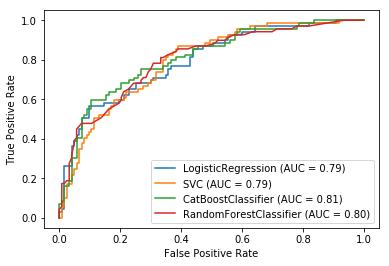

In [94]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(diabetes_LR,X_teste,y_teste)
plot_roc_curve(diabetes_SVM,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_cat,X_teste,y_teste, ax=disp.ax_);
plot_roc_curve(diabetes_RF,X_teste,y_teste, ax=disp.ax_);